In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import statistics 

In [2]:
def get_pop(state, df2, b): # this function is used to obtain each state population
    listo = list(state_series)
    for x in listo:
        df = df2[df2['state'] == state] 
        a = df[b]
        if df.size == 0:
            return float('nan')
        else:
            return a.squeeze()

In [5]:
data_state = pd.read_excel('data/state.xlsx')
state_series = data_state['state'].squeeze()

In [6]:
data_dem3 = pd.read_excel('data/demog2.xlsx')

In [7]:
state = 'US'

In [8]:
data_dem2 = (get_pop(state, data_dem3, '0_1'), get_pop(state, data_dem3, '2_4'), get_pop(state, data_dem3, '5_11'), get_pop(state, data_dem3, '12_18'), get_pop(state, data_dem3, '19_49'), get_pop(state, data_dem3, '50_64'), get_pop(state, data_dem3, '65+'))
data_dem2 

(7637200, 11455800.0, 24324200.0, 33044800, 131846000.0, 62049000.0, 55836000)

In [9]:
N = np.sum(data_dem2)
N

326193000.0

In [10]:
#LOAD VACC DATA
y = state

vac1 = pd.read_csv('Script/vacc_data_RSV6501/vacc_RSV_High1_'+ y + '.csv') # high vacc scenario 
vac2 = pd.read_csv('Script/vacc_data_RSV6501/vacc_RSV_Mid1_'+ y + '.csv') #midd vacc scenario 
vac3 = pd.read_csv('Script/vacc_data_RSV6501/vacc_RSV_Low1_'+ y + '.csv')#low vcc scenario



In [11]:
pop = data_dem2
vacc_1 = np.zeros([7, 800]) ## since 7 age groups 
vacc_2 = np.zeros([7, 800])
vacc_3 = np.zeros([7, 800])
vacc_1[0,0:532] = vac1['0_1'].to_numpy()  # high
vacc_1[1,0:532] = vac1['2_4'].to_numpy()
vacc_1[2,0:532] = vac1['5_11'].to_numpy()
vacc_1[3,0:532] = vac1['12_18'].to_numpy()
vacc_1[4,0:532] = vac1['19_49'].to_numpy()
vacc_1[5,0:532] = vac1['50_64'].to_numpy()
vacc_1[6,0:532] = vac1['65+'].to_numpy()

vacc_2[0,0:532] = vac2['0_1'].to_numpy()  # mid
vacc_2[1,0:532] = vac2['2_4'].to_numpy()
vacc_2[2,0:532] = vac2['5_11'].to_numpy()
vacc_2[3,0:532] = vac2['12_18'].to_numpy()
vacc_2[4,0:532] = vac2['19_49'].to_numpy()
vacc_2[5,0:532] = vac2['50_64'].to_numpy()
vacc_2[6,0:532] = vac2['65+'].to_numpy()


vacc_3[0,0:532] = vac3['0_1'].to_numpy()#low
vacc_3[1,0:532] = vac3['2_4'].to_numpy()
vacc_3[2,0:532] = vac3['5_11'].to_numpy()
vacc_3[3,0:532] = vac3['12_18'].to_numpy()
vacc_3[4,0:532] = vac3['19_49'].to_numpy()
vacc_3[5,0:532] = vac3['50_64'].to_numpy()
vacc_3[6,0:532] = vac3['65+'].to_numpy()


In [1]:
def cum_to_active(Ic): ## cumulative to active case calculation 
    Iac = np.zeros([len(Ic), ])
    for i in range(len(Ic)-1):
        Iac[i] = Ic[i+1] - Ic[i]
        
    Iac[len(Ic)-1] = Iac[len(Ic)-2]
    return Iac

In [20]:
def computerate(i, CWW, aW, I, Ni): ## to comupute the revised rate based on inculsion of CM, and inetractions, infections  used in model keeps updating 
    rate = 0
    for n in range(7):
        rate += aW*CWW[i,n]*(np.sum(max(0, I[n]))/Ni[n])
        #return 1
    return rate

I = np.ones([7, ])

In [21]:
US2 = pd.read_csv('Script/hosp_rsv_2022_2023.csv')# loading hosp data fpr 2022-23 season USA 

In [22]:
hosps = US2['total'].to_numpy()
print(len(hosps))

hosp_avg = np.zeros([279, ])
for i in range(279):
    hosp_avg[i] = np.mean(hosps[i:i+7])
    

286


In [25]:
CM_all2 = np.genfromtxt('files/CMs/CM_alll.txt')
CM_s2 = np.genfromtxt('files/CMs/CM_school.txt')  # Contact matrix (7 age groups) 
CM_w2 = np.genfromtxt('files/CMs/CM_without_school.txt')

In [26]:
#calender date aligning 
cal = pd.read_csv('data/calend_newRSVFLUUCOVID.csv')
school = cal['school2223'].to_numpy()
work = cal['work2223'].to_numpy()

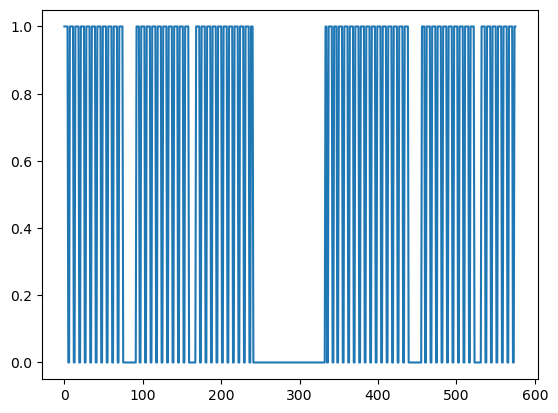

In [27]:
plt.plot(school)

In [28]:
school.shape

(632,)

In [29]:
vacc_cov = pd.read_csv('cumulative_dose.csv')*0 

In [30]:
Seed = np.zeros([700, 1])

'for i in range(0,112):\n    Seed[i] = (50/7)*(N/320e6)\nfor i in range(112,420):\n    Seed[i] = (50/8)*(N/320e6)\nfor i in range(420,520): \n    Seed[i] = (50/7)*(N/320e6)\nfor i in range(520,640):\n    Seed[i] = (50/9)*(N/320e6)  \n'

In [32]:
def get_sero(state, df2, age):
    df = df2[df2['state'] == state]
    a = df[age]
    if df.size == 0:
        return float('0') 
    else:
        return a.squeeze()

In [33]:
get_sero(state, vacc_cov, '5_12')

0.0

In [34]:
def set_imm(val):  
    for i in range(1000):#### 
        fac = (2 + i*0.01) ## Updated to 7 ages 
        MM_0 = [fac*0.15, fac*0.01, fac*0.0015, fac*0.00015, fac*0.0006, fac*0.002, fac* 0.0085] # multiplying here with the hosp arte that Anass sent 
        xx = np.sum(np.array(data_dem2)*np.array(MM_0))/N
        if (xx >=  val):
            break
    return MM_0

In [35]:
M3_0 = set_imm(0) ##setting to zero since low intial immunity  

In [36]:
M3_0

[0.3, 0.02, 0.003, 0.0003, 0.0012, 0.004, 0.017]

In [38]:
facc = 0.144   ### Updated to 7 
IHR = [facc*0.15, facc*0.01, facc*0.0015, facc*0.00015, facc*0.0006, facc*0.002, facc* 0.0085]
IRec = [1- facc*0.15, 1- facc*0.01, 1- facc*0.0015, 1- facc*0.00015, 1- facc*0.0006, 1- facc*0.002, 1- facc* 0.0085]
np.sum(np.array(data_dem2)*np.array(IHR))/N

0.0008738156161536266

In [39]:
faccc = 0.635   
HDR = [faccc*0.13, faccc*0.1, faccc*0.04,faccc*0.04, faccc*0.054, faccc*0.13, faccc*0.316]
HDRec = [1-faccc*0.13, 1- faccc*0.1, 1- faccc*0.04, 1-faccc*0.04, 1-faccc*0.054, 1-faccc*0.13, 1-faccc*0.316]
np.sum(np.array(data_dem2)*np.array(HDR))/N

0.07254068238742095

In [40]:
M2_0 = [0.01*get_sero(state, vacc_cov, '0_4'), 0.01*get_sero(state, vacc_cov, '0_4'), 0.01*get_sero(state, vacc_cov, '5_12'), 0.01*get_sero(state, vacc_cov, '13_17'), 0.01*get_sero(state, vacc_cov, '18_49'), 0.01*get_sero(state, vacc_cov, '50_64') , 0.01*get_sero(state, vacc_cov, '65+')]
np.sum(np.array(data_dem2)*np.array(M2_0))/N
M2_0

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [41]:
g_E = 1/5 ### incubation is 5 days for RSV so rate of transition from E to I is 1/5 
g_hosp = 1/6  ## as per lit
Ni = data_dem2
g_Recovery = 1/6.8  ## recovery is 1/infectious period so 1/6.8 for RSV
g_hosp = 1/6

In [43]:
### fitted values using cosine function fit to the monthly data of avg humidity 
zz=[71.60552483, 71.55040403, 71.49615248, 71.44278626, 71.39032118,
       71.33877279, 71.28815635, 71.23848688, 71.18977909, 71.14204741,
       71.09530598, 71.04956866, 71.004849  , 70.96116025, 70.91851536,
       70.87692696, 70.83640737, 70.79696861, 70.75862236, 70.72137999,
       70.68525252, 70.65025066, 70.61638479, 70.58366495, 70.55210081,
       70.52170175, 70.49247677, 70.46443452, 70.43758332, 70.41193113,
       70.38748553, 70.36425379, 70.34224278, 70.32145903, 70.30190869,
       70.28359755, 70.26653105, 70.25071424, 70.2361518 , 70.22284806,
       70.21080695, 70.20003205, 70.19052654, 70.18229324, 70.17533459,
       70.16965266, 70.16524913, 70.16212529, 70.16028209, 70.15972005,
       70.16043936, 70.1624398 , 70.16572077, 70.1702813 , 70.17612005,
       70.18323527, 70.19162487, 70.20128635, 70.21221686, 70.22441315,
       70.23787161, 70.25258826, 70.26855873, 70.28577828, 70.30424182,
       70.32394388, 70.34487862, 70.36703983, 70.39042094, 70.41501504,
       70.44081483, 70.46781266, 70.49600054, 70.52537011, 70.55591267,
       70.58761918, 70.62048022, 70.65448608, 70.68962666, 70.72589157,
       70.76327004, 70.80175101, 70.84132308, 70.88197451, 70.92369326,
       70.96646697, 71.01028296, 71.05512826, 71.10098956, 71.14785329,
       71.19570555, 71.24453217, 71.29431868, 71.34505032, 71.39671206,
       71.4492886 , 71.50276435, 71.55712346, 71.61234984, 71.66842711,
       71.72533866, 71.78306763, 71.8415969 , 71.90090913, 71.96098675,
       72.02181196, 72.08336674, 72.14563283, 72.2085918 , 72.27222498,
       72.33651352, 72.40143837, 72.4669803 , 72.53311987, 72.59983749,
       72.6671134 , 72.73492764, 72.80326015, 72.87209065, 72.94139876,
       73.01116394, 73.08136551, 73.15198268, 73.22299452, 73.29437998,
       73.36611792, 73.43818707, 73.51056608, 73.58323351, 73.65616781,
       73.72934739, 73.80275054, 73.87635553, 73.95014054, 74.0240837 ,
       74.09816311, 74.17235682, 74.24664283, 74.32099915, 74.39540372,
       74.46983452, 74.54426947, 74.61868653, 74.69306364, 74.76737876,
       74.84160987, 74.91573498, 74.98973212, 75.06357937, 75.13725483,
       75.21073669, 75.28400316, 75.35703254, 75.42980318, 75.50229352,
       75.57448208, 75.64634747, 75.7178684 , 75.78902366, 75.85979219,
       75.93015299, 76.00008524, 76.0695682 , 76.13858129, 76.20710405,
       76.27511618, 76.34259752, 76.40952809, 76.47588805, 76.54165773,
       76.60681764, 76.67134848, 76.73523112, 76.79844664, 76.8609763 ,
       76.92280158, 76.98390415, 77.0442659 , 77.10386896, 77.16269566,
       77.22072856, 77.27795048, 77.33434445, 77.38989376, 77.44458196,
       77.49839284, 77.55131045, 77.60331911, 77.65440342, 77.70454823,
       77.75373868, 77.80196021, 77.84919851, 77.89543959, 77.94066976,
       77.9848756 , 78.02804402, 78.07016223, 78.11121774, 78.1511984 ,
       78.19009234, 78.22788805, 78.26457434, 78.30014032, 78.33457545,
       78.36786954, 78.40001273, 78.43099547, 78.4608086 , 78.48944327,
       78.51689101, 78.54314368, 78.56819351, 78.59203306, 78.61465527,
       78.63605345, 78.65622124, 78.67515268, 78.69284215, 78.70928442,
       78.7244746 , 78.73840821, 78.7510811 , 78.76248953, 78.77263011,
       78.78149985, 78.7890961 , 78.79541662, 78.80045955, 78.80422337,
       78.80670698, 78.80790964, 78.807831  , 78.80647108, 78.80383028,
       78.79990938, 78.79470955, 78.78823233, 78.78047963, 78.77145375,
       78.76115738, 78.74959355, 78.7367657 , 78.72267762, 78.7073335 ,
       78.69073787, 78.67289566, 78.65381215, 78.633493  , 78.61194423,
       78.58917223, 78.56518373, 78.53998586, 78.51358607, 78.48599219,
       78.4572124 , 78.42725522, 78.39612954, 78.36384457, 78.33040988,
       78.29583538, 78.26013131, 78.22330826, 78.18537713, 78.14634917,
       78.10623593, 78.06504932, 78.02280152, 77.97950506, 77.93517278,
       77.8898178 , 77.84345356, 77.79609381, 77.74775258, 77.69844419,
       77.64818326, 77.59698467, 77.5448636 , 77.49183549, 77.43791606,
       77.38312129, 77.3274674 , 77.2709709 , 77.21364852, 77.15551725,
       77.09659431, 77.03689717, 76.97644352, 76.91525126, 76.85333853,
       76.79072368, 76.72742526, 76.66346203, 76.59885294, 76.53361714,
       76.46777395, 76.40134289, 76.33434365, 76.26679607, 76.19872017,
       76.13013613, 76.06106427, 75.99152505, 75.92153908, 75.8511271 ,
       75.78030997, 75.70910868, 75.63754433, 75.56563812, 75.49341137,
       75.42088546, 75.3480819 , 75.27502225, 75.20172818, 75.12822138,
       75.05452365, 74.98065683, 74.9066428 , 74.8325035 , 74.75826089,
       74.68393697, 74.60955377, 74.53513333, 74.4606977 , 74.38626893,
       74.3118691 , 74.23752023, 74.16324436, 74.0890635 , 74.01499963,
       73.9410747 , 73.86731061, 73.79372922, 73.72035234, 73.64720171,
       73.574299  , 73.50166582, 73.42932369, 73.35729405, 73.28559823,
       73.21425749, 73.14329297, 73.07272569, 73.00257656, 72.93286638,
       72.86361579, 72.79484532, 72.72657534, 72.6588261 , 72.59161765,
       72.52496992, 72.45890266, 72.39343543, 72.32858766, 72.26437854,
       72.2008271 , 72.13795218, 72.07577241, 72.01430621, 71.9535718 ,
       71.89358717, 71.8343701 , 71.77593814, 71.71830859, 71.66149854,
       71.60552483]

max(zz)

78.80790964

In [44]:
zz2=np.zeros([576, 1])
for i in range(len(zz2)):
    j=(i+285)%365 # since from october 3, 2022
    #print(j)
    zz2[i]=1+(74.48-zz[j])*0.05 # reversing the humidity factor since inversly related 

In [45]:
np.size(zz2)

576

In [46]:
def sim_hospA(x, x0, x01, x02, x03, x04, x05, x06, x1, x2, x3):
    sc1 = "normal"
    sc2 = "pesImm"
    Nd = 286# 
    dt = 1 #time step
    t = 0  #number of steps
    bita = x0/N
    S = np.zeros([7])
    E = np.zeros([7, ])
    I = np.zeros([7, ])
    H = np.zeros([7, ])
    R = np.zeros([7, ])
    
    
    if (sc2 == 'optImm'):
        M3_0 = set_imm(0) # for RSV setting to 0 
    if (sc2 == 'pesImm'):
        M3_0 = set_imm(0)# for RSV setting to 0 
    
    D = np.zeros([7, ])
    M = np.array(M3_0)
    Mv = np.array(M_0)
  
    sigma = 0.000  #0.005
    
    np.random.seed()
    def dW(delta_t):
        #var = 50
        return np.random.normal(loc=0.0, scale=np.sqrt(delta_t))
    
    def g(y, sigma):
        return sigma*(y)
    
    
    case_c = np.zeros([7, ])
    hosp_c = np.zeros([7, ])

    D_new = np.zeros([7, ])  
    
    S_new = np.zeros([7, ])
    E_new = np.zeros([7, ])
    I_new = np.zeros([7, ])
    H_new = np.zeros([7, ])
    R_new = np.zeros([7, ])

    D_age = np.zeros([7, ])
    
    M_new = np.array(M3_0)
    Mv_new = np.zeros([7, ])
        
    case_c_new = np.zeros([7, ])
    hosp_c_new = np.zeros([7, ])
    
    Ic_ov = np.zeros([Nd, ])
    hosp_cc = np.zeros([Nd, ])
    Ia_ov = np.zeros([Nd, ])
    cum = np.zeros([Nd, ])
    D_ov = np.zeros([Nd, ])
    symp_r = np.zeros([Nd, ])

    S_ov = np.zeros([Nd, ])
    E_ov = np.zeros([Nd, ])
    P_ov = np.zeros([Nd, ])
    I_ov = np.zeros([Nd, ])
    H_ov = np.zeros([Nd, ])
    R_ov = np.zeros([Nd, ])
    M_ov = np.zeros([Nd, 7])
    Mv_ov = np.zeros([Nd, 7])
    symp_rr = np.zeros([Nd, 7])
    M_ovv = np.zeros([Nd, ])
    Mv_ovv = np.zeros([Nd, ])
    Mv_ovv19 = np.zeros([Nd, 7])
    prot = np.zeros([Nd, 7])
    
    bita_s = np.zeros([Nd, ])    
    count = 0

    
    
    E0 = [x2 for n in range(7)]
    I_0 = [x1 for n in range(7)]
    H0 = [x3/6 for n in range(7)]
    

    w1 = 1/(6*30) 
    ww = 1/(10)  
    
    D0 = [0/6  for n in Ni]
    S10 = [Ni[n] - E0[n] - I_0[n] - H0[n] - D0[n] for n in range(7)]
    R0 = [0 for n in Ni]  
    S = np.asarray(S10)
    E = np.asarray(E0)
    I = np.asarray(I_0); H = np.asarray(H0); D = np.asarray(D0); R = np.asarray(R0); Mv = np.asarray(M2_0); M = np.asarray(M3_0)
    for tt in range(int(Nd/dt)):
        if (sc2 == "pesImm"):
            Kv_o = [3, 3, 2.33, 2.33, 2.33, 2.33, 2.33] ##### As per literature froo RSV 
            Kvh_o = [0, 0, 4, 4, 4, 4, 4]  #### as per literature for RSV (using conditional it was calculated)
            K_o = [2.33, 2.33, 2.33, 2.33, 2.33, 2.33, 2.33]# natural imm RSV
            Kh_o = [2.33, 2.33, 2.33, 2.33, 2.33, 2.33, 2.33]# natural imm RSV
            


        
        if (tt*dt<=183):
            w2= (np.log(2))/(6*30)
        if (tt*dt>183 and tt*dt<=365):
            prop1 = (np.sum(H_ov[tt-183:tt-1]))/(np.sum(H_ov[0:tt-1]))
            w2=(prop1*((np.log(2))/(9*30)))+((1-prop1)*((np.log(2))/(1.4*30)))   # calculated exponential decay manually                
        if (tt*dt >=365):
            prop2 = (np.sum(H_ov[tt-183:tt-1]))/(np.sum(H_ov[tt-365:tt-1]))
            w2=(prop2*((np.log(2))/(9*30)))+((1-prop2)*((np.log(2))/(1.4*30)))   
    
        zx = 1
        
        if (tt*dt  < 31):
            bita = zz2[count]*(x0 + (tt*dt)*(x01 - x0)/30)/N

            
        if (tt*dt >= 31 and tt*dt < 61):
            bita = zz2[count]*(x01 + (tt*dt - 30)*(x02 - x01)/30)/N



        if (tt*dt >= 61 and tt*dt < 91):
            sigma = 0.000
            bita = zz2[count]*(x02 + (tt*dt - 60)*(x03 - x02)/30)/N

            
        if (tt*dt >= 91 and tt*dt < 121):
            sigma = 0.000
            bita = zz2[count]*(x03 + (tt*dt - 90)*(x04 - x03)/30)/N

            
        if (tt*dt >= 121 and tt*dt < 151):
            sigma = 0.000
            bita = zz2[count]*(x04 + (tt*dt - 120)*(x05 - x04)/30)/N
   

    
        if (tt*dt >= 151 and tt*dt < 332):  
            sigma = 0.000
            bita = zz2[count]*(x05 + (tt*dt - 150)*(x06 - x05)/181)/N

        
        if (tt*dt >= 332):
           
            if (sc2 == "pesImm"):
                #bita = zz2[count]*1*(x0+x02+x04+x06+x01+x03+x05)/(7*N)
                bita = zz2[count]*0.038 # average of pre covid seasons 
              
            else:
                #bita = zz2[count]*1*(x0+x02+x04+x06+x01+x03+x05)/(7*N)
                bita = zz2[count]*0.038
                


            #zx = z3 


            
        CM = CM_all2
        if (count <= 800):
            if (school[count] == 0):
                CM = CM - CM_s2

            if (work[count] == 0):
                CM = CM - CM_w2 - CM_s2
                
        for i in range(7):      
            S_g  =  g(S[i],sigma)*dW(dt)
            E_g  =  g(E[i],sigma)*dW(dt)
            I_g  =  g(I[i],sigma)*dW(dt)
            H_g = g(H[i],sigma)*dW(dt)              
            R_g = g(R[i],sigma)*dW(dt)  

            
        
        
        if (sc2 == "pesImm"):
            Kv_o = [3, 3, 2.33, 2.33, 2.33, 2.33, 2.33] ##### As per literature froo RSV 
            Kvh_o = [0, 0, 4, 4, 4, 4, 4]  #### as per literature for RSV
            K_o = [2.33, 2.33, 2.33, 2.33, 2.33, 2.33, 2.33]# natural imm against RSV inf 
            Kh_o = [2.33, 2.33, 2.33, 2.33, 2.33, 2.33, 2.33]# natural imm against RSV hosp

       
            
      

        for i in range(7):   
            if (i==0):
                k1 = (7/N)*(data_dem2[6]/data_dem2[0])  
            else: 
                k1 = 7/N
            prot_inf = K_o[i]*M[i] + Kv_o[i]*Mv[i]
            prot_hosp = Kh_o[i]*M[i] + Kvh_o[i]*Mv[i]# protec against hosp 

            S_new[i] = S[i] + dt*(-(bita/(1 + prot_inf))*computerate(i, CM, 1, I, Ni)*S[i] + ww*R[i]) + S_g
            E_new[i] = E[i] + dt*((bita/(1 + prot_inf))*computerate(i, CM, 1, I , Ni)*S[i] - g_E*E[i])  + E_g
                
            case_c_new[i] = case_c[i] + dt*(g_E*E[i])      
            I_new[i] = I[i] + dt*(g_E*E[i]  - g_Recovery*(IHR[i]/(1 + prot_hosp))*I[i] - g_Recovery*IRec[i]*I[i]) + I_g
            hosp_c_new[i] = hosp_c[i] + dt*(g_Recovery*(IHR[i]/(1 + prot_hosp))*I[i])
                
            H_new[i] = H[i] + dt*(g_Recovery*(IHR[i]/(1 + prot_hosp))*I[i]  - (zx*HDR[i]*g_hosp/(1 + prot_hosp))*H[i] - g_hosp*HDRec[i]*H[i]) + H_g    
            D_new[i] = D[i] + dt*(zx*HDR[i]*g_hosp/(1 + prot_hosp)*H[i]) 
            R_new[i] = R[i] + dt*( g_hosp*HDRec[i]*H[i] + g_Recovery*IRec[i]*I[i] - ww*R[i]) + R_g

                     
                
            if (count <= 800):
                print (g_Recovery*IHR[0 ])
                    if (sc1 == 'high'):
                        vacc_ref = vacc_1 # for projections 
                    
                    elif (sc1 == 'mid'):
                        vacc_ref = vacc_2 # for projections 
                        
                    else:
                        vacc_ref = vacc_3 # for projections 
                    
                    
                    Mv_new[i] = Mv[i] + dt*(- w1*Mv[i] + k1*vacc_ref[i, count])
                    M_new[i] = M[i] + dt * (-w2 * M[i] + k3 * R[i] / prot_inf) 
                    prot[count,i] = (1/(1+prot_inf))
                     
                            
   

                        
        
                            
        S = S_new; E = E_new; I = I_new; case_c = case_c_new; hosp_c = hosp_c_new; H = H_new; D = D_new; R = R_new; M = M_new; Mv = Mv_new; #M1 = M1_new;
        if(tt % int(1/dt) == 0):
          
            for i in range(7):
                Mv_ovv19[count, i] = Mv[i]
            bita_s[count] = bita   
            Ic_ov[count] = np.sum(case_c)
            D_ov[count] = np.sum(D)
            S_ov[count] = np.sum(S)
            cum[count] = np.sum(case_c)
            hosp_cc[count] = np.sum(hosp_c)
            

            Mv_ovv[count] = np.sum(np.array(data_dem2)*np.array(Mv))/N
            M_ovv[count] = np.sum(np.array(data_dem2)*np.array(M))/N
                
            

            
            E_ov[count] = np.sum(E)
            I_ov[count] = np.sum(I + H)
            H_ov[count] = np.sum(H)
            R_ov[count] = np.sum(R)
            count = count+1
 
    
    D_age = np.sum(D)      
    D2_ova = cum_to_active(Ic_ov)
    H_ova = cum_to_active(hosp_cc)
    D3_ova = cum_to_active(D_ov)
    I_ov_avg = np.zeros([Nd-7, ])
    D_ov_avg = np.zeros([Nd-7, ])
    H_ov_avg = np.zeros([Nd-7, ])
    for i in range(Nd-7):
        
        I_ov_avg[i] = max(np.mean(D2_ova[i:i+7]), 0)
        D_ov_avg[i] = max(np.mean(D3_ova[i:i+7]), 0)
        H_ov_avg[i] = max(np.mean(H_ova[i:i+7]), 0)
    return H_ov_avg

In [47]:
def simulation_st1(x):
    Nd = 576#calender school work 
    dt = 1 #time step
    t = 0  #number of steps
    bita = x0/N
    S = np.zeros([7])
    E = np.zeros([7, ])
    I = np.zeros([7, ])
    H = np.zeros([7, ])
    R = np.zeros([7, ])
    
    
    if (sc2 == 'optImm'):
        M3_0 = set_imm(0)
    if (sc2 == 'pesImm'):
        M3_0 = set_imm(0)
    
    D = np.zeros([7, ])
    M = np.array(M3_0)
    Mv = np.array(M_0)
  
    sigma = 0.000  #0.005
    
    #np.random.seed()
    def dW(delta_t):
        #var = 50
        return np.random.normal(loc=0.0, scale=np.sqrt(delta_t))
    
    def g(y, sigma):
        return sigma*(y)
    
    
    case_c = np.zeros([7, ])
    hosp_c = np.zeros([7, ])

    D_new = np.zeros([7, ])  
    
    S_new = np.zeros([7, ])
    E_new = np.zeros([7, ])
    I_new = np.zeros([7, ])
    H_new = np.zeros([7, ])
    R_new = np.zeros([7, ])

    D_age = np.zeros([7, ])
    
    M_new = np.array(M3_0)
    Mv_new = np.zeros([7, ])
        
    case_c_new = np.zeros([7, ])
    hosp_c_new = np.zeros([7, ])
    
    Ic_ov = np.zeros([Nd, ])
    hosp_cc = np.zeros([Nd, ])
    hosp_cc1 = np.zeros([Nd, ])
    hosp_cc2 = np.zeros([Nd, ])
    hosp_cc3 = np.zeros([Nd, ])
    hosp_cc4 = np.zeros([Nd, ])
    hosp_cc5 = np.zeros([Nd, ])
    hosp_cc6 = np.zeros([Nd, ])
    hosp_cc0 = np.zeros([Nd, ])
    
    case_cc0 = np.zeros([Nd, ])
    Ia_ov = np.zeros([Nd, ])
    cum = np.zeros([Nd, ])
    D_ov = np.zeros([Nd, ])
    symp_r = np.zeros([Nd, ])

    S_ov = np.zeros([Nd, ])
    E_ov = np.zeros([Nd, ])
    P_ov = np.zeros([Nd, ])
    I_ov = np.zeros([Nd, ])
    H_ov = np.zeros([Nd, ])
    R_ov = np.zeros([Nd, ])
    M_ov = np.zeros([Nd, 7])
    Mv_ov = np.zeros([Nd, 7])
    symp_rr = np.zeros([Nd, 7])
    M_ovv = np.zeros([Nd, ])
    Mv_ovv = np.zeros([Nd, ])
    Mv_ovv19 = np.zeros([Nd, 7])
    prot = np.zeros([Nd, 7])
    
    bita_s = np.zeros([Nd, ])    
    count = 0

    
    
    E0 = [x2 for n in range(7)]
    I_0 = [x1 for n in range(7)]
    H0 = [x3/6 for n in range(7)]
    

    w1 = 1/(6*30) ##waning period from literature
    ww = 1/(10)  
    
    D0 = [0/6  for n in Ni]
    S10 = [Ni[n] - E0[n] - I_0[n] - H0[n] - D0[n] for n in range(7)]
    R0 = [0 for n in Ni]  
    S = np.asarray(S10)
    E = np.asarray(E0)
    I = np.asarray(I_0); H = np.asarray(H0); D = np.asarray(D0); R = np.asarray(R0); Mv = np.asarray(M2_0); M = np.asarray(M3_0)
    for tt in range(int(Nd/dt)):
        if (sc2 == "pesImm"):
            Kv_o = [3, 3, 2.33, 2.33, 2.33, 2.33, 2.33] ##### As per literature froo RSV 
            Kvh_o = [0, 0, 4, 4, 4, 4, 4]  #### as per literature for RSV
            K_o = [2.33, 2.33, 2.33, 2.33, 2.33, 2.33, 2.33]# natural imm against flu inf
            Kh_o = [2.33, 2.33, 2.33, 2.33, 2.33, 2.33, 2.33]# natural imm against flu hosp




        if (tt*dt<=183):
            w2= (np.log(2))/(6*30)
        if (tt*dt>183 and tt*dt<=365):
            prop1 = (np.sum(H_ov[tt-183:tt-1]))/(np.sum(H_ov[0:tt-1]))
            w2=(prop1*((np.log(2))/(9*30)))+((1-prop1)*((np.log(2))/(1.4*30)))   # calculated exponential decay manually                
        if (tt*dt >=365):
            prop2 = (np.sum(H_ov[tt-183:tt-1]))/(np.sum(H_ov[tt-365:tt-1]))
            w2=(prop2*((np.log(2))/(9*30)))+((1-prop2)*((np.log(2))/(1.4*30)))   
    
        zx = 1
        
        if (tt*dt  < 31):
            bita = zz2[count]*(x0 + (tt*dt)*(x01 - x0)/30)/N
            
        if (tt*dt >= 31 and tt*dt < 61):
            bita = zz2[count]*(x01 + (tt*dt - 30)*(x02 - x01)/30)/N

        if (tt*dt >= 61 and tt*dt < 91):
            sigma = 0.000
            bita = zz2[count]*(x02 + (tt*dt - 60)*(x03 - x02)/30)/N
            
        if (tt*dt >= 91 and tt*dt < 121):
            sigma = 0.000
            bita = zz2[count]*(x03 + (tt*dt - 90)*(x04 - x03)/30)/N
            
        if (tt*dt >= 121 and tt*dt < 151):
            sigma = 0.000
            bita = zz2[count]*(x04 + (tt*dt - 120)*(x05 - x04)/30)/N

    
        if (tt*dt >= 151 and tt*dt < 332):   
            sigma = 0.000
            bita = zz2[count]*(x05 + (tt*dt - 150)*(x06 - x05)/181)/N

        
        if (tt*dt >= 332):
           
            if (sc2 == "pesImm"):
                #bita = zz2[count]*1*(x0+x02+x04+x06+x01+x03+x05)/(7*N)
                bita = zz2[count]*0.038 # average of pre covid seasons 
              
            else:
                #bita = zz2[count]*1*(x0+x02+x04+x06+x01+x03+x05)/(7*N)
                bita = zz2[count]*0.038


            #zx = z3 


            
        CM = CM_all2
        if (count <= 800):
            if (school[count] == 0):
                CM = CM - CM_s2

            if (work[count] == 0):
                CM = CM - CM_w2 - CM_s2
                
        for i in range(7):      
            S_g  =  g(S[i],sigma)*dW(dt)
            E_g  =  g(E[i],sigma)*dW(dt)
            I_g  =  g(I[i],sigma)*dW(dt)
            H_g = g(H[i],sigma)*dW(dt)              
            R_g = g(R[i],sigma)*dW(dt)  
            
        
        
        if (sc2 == "pesImm"):
            Kv_o = [3, 3, 2.33, 2.33, 2.33, 2.33, 2.33] ##### As per literature froo RSV 
            Kvh_o = [0, 0, 4, 4, 4, 4, 4]  #### as per literature for RSV
            K_o = [2.33, 2.33, 2.33, 2.33, 2.33, 2.33, 2.33]# natural imm against flu inf
            Kh_o = [2.33, 2.33, 2.33, 2.33, 2.33, 2.33, 2.33]# natural imm against flu hosp
       
            
      

        for i in range(7): 
            if (i==0):
                k1 = (7/N)*(data_dem2[6]/data_dem2[0])  
            else: 
                k1 = 7/N
            prot_inf = K_o[i]*M[i] + Kv_o[i]*Mv[i]
            prot_hosp = Kh_o[i]*M[i] + Kvh_o[i]*Mv[i]# protec against hosp 

            S_new[i] = S[i] + dt*(-(bita/(1 + prot_inf))*computerate(i, CM, 1, I, Ni)*S[i] + ww*R[i]) + S_g
            E_new[i] = E[i] + dt*((bita/(1 + prot_inf))*computerate(i, CM, 1, I , Ni)*S[i] - g_E*E[i])  + E_g
                
            case_c_new[i] = case_c[i] + dt*(g_E*E[i])      
            I_new[i] = I[i] + dt*(g_E*E[i]  - g_Recovery*(IHR[i]/(1 + prot_hosp))*I[i] - g_Recovery*IRec[i]*I[i]) + I_g
            hosp_c_new[i] = hosp_c[i] + dt*(g_Recovery*(IHR[i]/(1 + prot_hosp))*I[i])
                
            H_new[i] = H[i] + dt*(g_Recovery*(IHR[i]/(1 + prot_hosp))*I[i]  - (zx*HDR[i]*g_hosp/(1 + prot_hosp))*H[i] - g_hosp*HDRec[i]*H[i]) + H_g    
            D_new[i] = D[i] + dt*(zx*HDR[i]*g_hosp/(1 + prot_hosp)*H[i]) 
            R_new[i] = R[i] + dt*( g_hosp*HDRec[i]*H[i] + g_Recovery*IRec[i]*I[i] - ww*R[i]) + R_g
                

                     
                
            if (count <= 800):
                
                    if (sc1 == 'high'):
                        vacc_ref = vacc_1 # for projections 
                    
                    elif (sc1 == 'mid'):
                        vacc_ref = vacc_2 # for projections 
                        
                    else:
                        vacc_ref = vacc_3 # for projections 
                    
                    Mv_new[i] = Mv[i] + dt*(- w1*Mv[i] + k1*vacc_ref[i, count])
                    M_new[i] = M[i] + dt * (-w2 * M[i] + k3 * R[i] / prot_inf) 
                    prot[count,i] = (1/(1+prot_inf))
                     
                                             
        
                            
        S = S_new; E = E_new; I = I_new; case_c = case_c_new; hosp_c = hosp_c_new; H = H_new; D = D_new; R = R_new; M = M_new; Mv = Mv_new; #M1 = M1_new;
        if(tt % int(1/dt) == 0):
        
            for i in range(7):
                Mv_ovv19[count, i] = Mv[i]
                

            bita_s[count] = bita    
            Ic_ov[count] = np.sum(case_c)
            case_cc0[count] = case_c[0]
            D_ov[count] = np.sum(D)
            S_ov[count] = np.sum(S)
            cum[count] = np.sum(case_c)
            hosp_cc[count] = np.sum(hosp_c)
            hosp_cc0[count] = hosp_c[0]
            hosp_cc1[count] = hosp_c[1]
            hosp_cc2[count] = hosp_c[2]
            hosp_cc3[count] = hosp_c[3]
            hosp_cc4[count] = hosp_c[4]
            hosp_cc5[count] = hosp_c[5]
            hosp_cc6[count] = hosp_c[6]
            
            Mv_ovv[count] = np.sum(np.array(data_dem2)*np.array(Mv))/N
            M_ovv[count] = np.sum(np.array(data_dem2)*np.array(M))/N
                
            
            E_ov[count] = np.sum(E)
            I_ov[count] = np.sum(I+H)
            H_ov[count] = np.sum(H)
            R_ov[count] = np.sum(R)
            count = count+1
 
    
    D_age = np.sum(D)      
    D2_ova = cum_to_active(Ic_ov)
    D2_ova0 = cum_to_active(case_cc0)
    H_ova = cum_to_active(hosp_cc)
    H_ova0 = cum_to_active(hosp_cc0)
    H_ova1 = cum_to_active(hosp_cc1)
    H_ova2 = cum_to_active(hosp_cc2)
    H_ova3 = cum_to_active(hosp_cc3)
    H_ova4 = cum_to_active(hosp_cc4)
    H_ova5 = cum_to_active(hosp_cc5)
    H_ova6 = cum_to_active(hosp_cc6)
    D3_ova = cum_to_active(D_ov)
    I_ov_avg = np.zeros([Nd-7, ])
    I_ov_avg0 = np.zeros([Nd-7, ])
    D_ov_avg = np.zeros([Nd-7, ])
    H_ov_avg = np.zeros([Nd-7, ])
    H_ov_avg0 = np.zeros([Nd-7, ])
    H_ov_avg1 = np.zeros([Nd-7, ])
    H_ov_avg2 = np.zeros([Nd-7, ])
    H_ov_avg3 = np.zeros([Nd-7, ])
    H_ov_avg4 = np.zeros([Nd-7, ])
    H_ov_avg5 = np.zeros([Nd-7, ])
    H_ov_avg6 = np.zeros([Nd-7, ])
    for i in range(Nd-7):
        
        I_ov_avg[i] = max(np.mean(D2_ova[i:i+7]), 0)
        I_ov_avg0[i] = max(np.mean(D2_ova0[i:i+7]), 0)
        D_ov_avg[i] = max(np.mean(D3_ova[i:i+7]), 0)
        H_ov_avg[i] = max(np.mean(H_ova[i:i+7]), 0)
        H_ov_avg0[i] = max(np.mean(H_ova0[i:i+7]), 0)
        H_ov_avg1[i] = max(np.mean(H_ova1[i:i+7]), 0)
        H_ov_avg2[i] = max(np.mean(H_ova2[i:i+7]), 0)
        H_ov_avg3[i] = max(np.mean(H_ova3[i:i+7]), 0)
        H_ov_avg4[i] = max(np.mean(H_ova4[i:i+7]), 0)
        H_ov_avg5[i] = max(np.mean(H_ova5[i:i+7]), 0)
        H_ov_avg6[i] = max(np.mean(H_ova6[i:i+7]), 0)

    return I_ov_avg,I_ov_avg0, D_ov_avg, H_ov_avg, D2_ova, Mv_ovv19, M_ovv, Mv_ovv, S_ov, E_ov, bita_s, R_ov, I_ov,prot,H_ov_avg0,H_ov_avg1,H_ov_avg2,H_ov_avg3,H_ov_avg4,H_ov_avg5, H_ov_avg6

In [48]:
cof_b = 1
cof_z = 1
cof_y = 1


std = 0
k1 = 7/N          

k3 = 0.5/N          
M_0 = M2_0

x0, x01, x02, x03, x04, x05, x06, x1, x2, x3, x4 = 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1
z0, z1, z2, z3, z4, z6 =  1, 1, 1, 1, 1, 0
y0, y1, y2, y3,y4, y6 = 50, 50, 50, 50, 50,  2

In [49]:
Save_par = [k1, k3, cof_b, cof_y, cof_z]

In [61]:
import os
os.makedirs('fit_param_new_RSV/'+state+'', exist_ok=True)

In [50]:
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit

In [51]:
xdata = np.linspace(0, 279, 279)
ydata = hosp_avg


In [52]:
popt, pcov = curve_fit(sim_hospA, xdata, ydata, p0 = [0.05*N, 0.05*N, 0.05*N, 0.05*N, 0.05*N, 0.05*N, 0.05*N, 0.0005*N, 0.0005*N, 0.00000153*N], bounds = ([0.0*N, 0.0*N, 0.0*N, 0.0*N, 0.0*N, 0.0*N, 0.0*N, 0.0*N, 0.00000*N, 0.0000000*N], [0.1*N, 0.1*N, 0.1*N, 0.1*N, 0.1*N, 0.1*N, 0.1*N, 0.02*N, 0.02*N, 0.0002*N]))
print(popt)
print('haw')  
x0, x01, x02, x03, x04, x05, x06, x1, x2, x3 = popt[0], popt[1], popt[2], popt[3], popt[4], popt[5],  popt[6], popt[7], popt[8], popt[9]


[2.25754208e+07 2.41695232e+07 2.18984953e+07 1.42712540e+07
 1.31827499e+07 1.15740444e+07 1.36598560e+07 8.65409160e-04
 1.01588235e+06 2.73418085e-02]
haw


In [56]:
np.std(popt[0:6])/N

0.015459616507345876

In [79]:
sc1 = 'high'           
sc2 = 'pesImm'
I_ov_avg, I_ov_avg0, D_ov_avg, H_ov_avg, D2_ova, Mv_ovv19, M_ovv, Mv_ovv, S_ov, E_ov, bita_s, R_ov, I_ov, prot,H_ov_avg0,H_ov_avg1,H_ov_avg2,H_ov_avg3,H_ov_avg4,H_ov_avg5, H_ov_avg6 = simulation_st1(sc1)


In [80]:
popt=popt
sc1 ='mid'
sc2 = 'pesImm' 
I_ov_avg1a, I_ov_avg0a, D_ov_avg1a, H_ov_avg1a, D2_ova1a, Mv_ovv191a, M_ovv1a,  Mv_ovv1a, S_ov1a, E_ov1a, bita_s1a, R_ov1a, I_ov1a, prot1a,H_ov_avg01a,H_ov_avg11a,H_ov_avg21a,H_ov_avg31a,H_ov_avg41a,H_ov_avg51a,H_ov_avg61a = simulation_st1(sc1)


In [81]:
popt=popt
sc1 ='low'
sc2 = 'pesImm' 
I_ov_avg2b, I_ov_avg0b, D_ov_avg2b, H_ov_avg2b, D2_ova2b, Mv_ovv192b, M_ovv2b, Mv_ovv2b, S_ov2b, E_ov2b, bita_s2b, R_ov2b, I_ov2b, prot2b,H_ov_avg02b,H_ov_avg12b,H_ov_avg22b,H_ov_avg32b,H_ov_avg42b,H_ov_avg52b,H_ov_avg62b = simulation_st1(0)


In [58]:
Save_par = [k1, k3, cof_b, cof_y, cof_z]
np.savetxt('fit_param_new_RSV/'+state+'/popt_post.csv', popt, delimiter=',')
np.savetxt('fit_param_new_RSV/'+state+'/param_post.csv', Save_par, delimiter=',')
np.savetxt('fit_param_new_RSV/'+state+'/M2_0_post.csv', M2_0, delimiter=',')
np.savetxt('fit_param_new_RSV/'+state+'/M3_0_post.csv', M3_0, delimiter=',')

In [74]:
 1*(x0+x02+x04+x06+x01+x03+x05)/(7*N)

0.05414718442934487

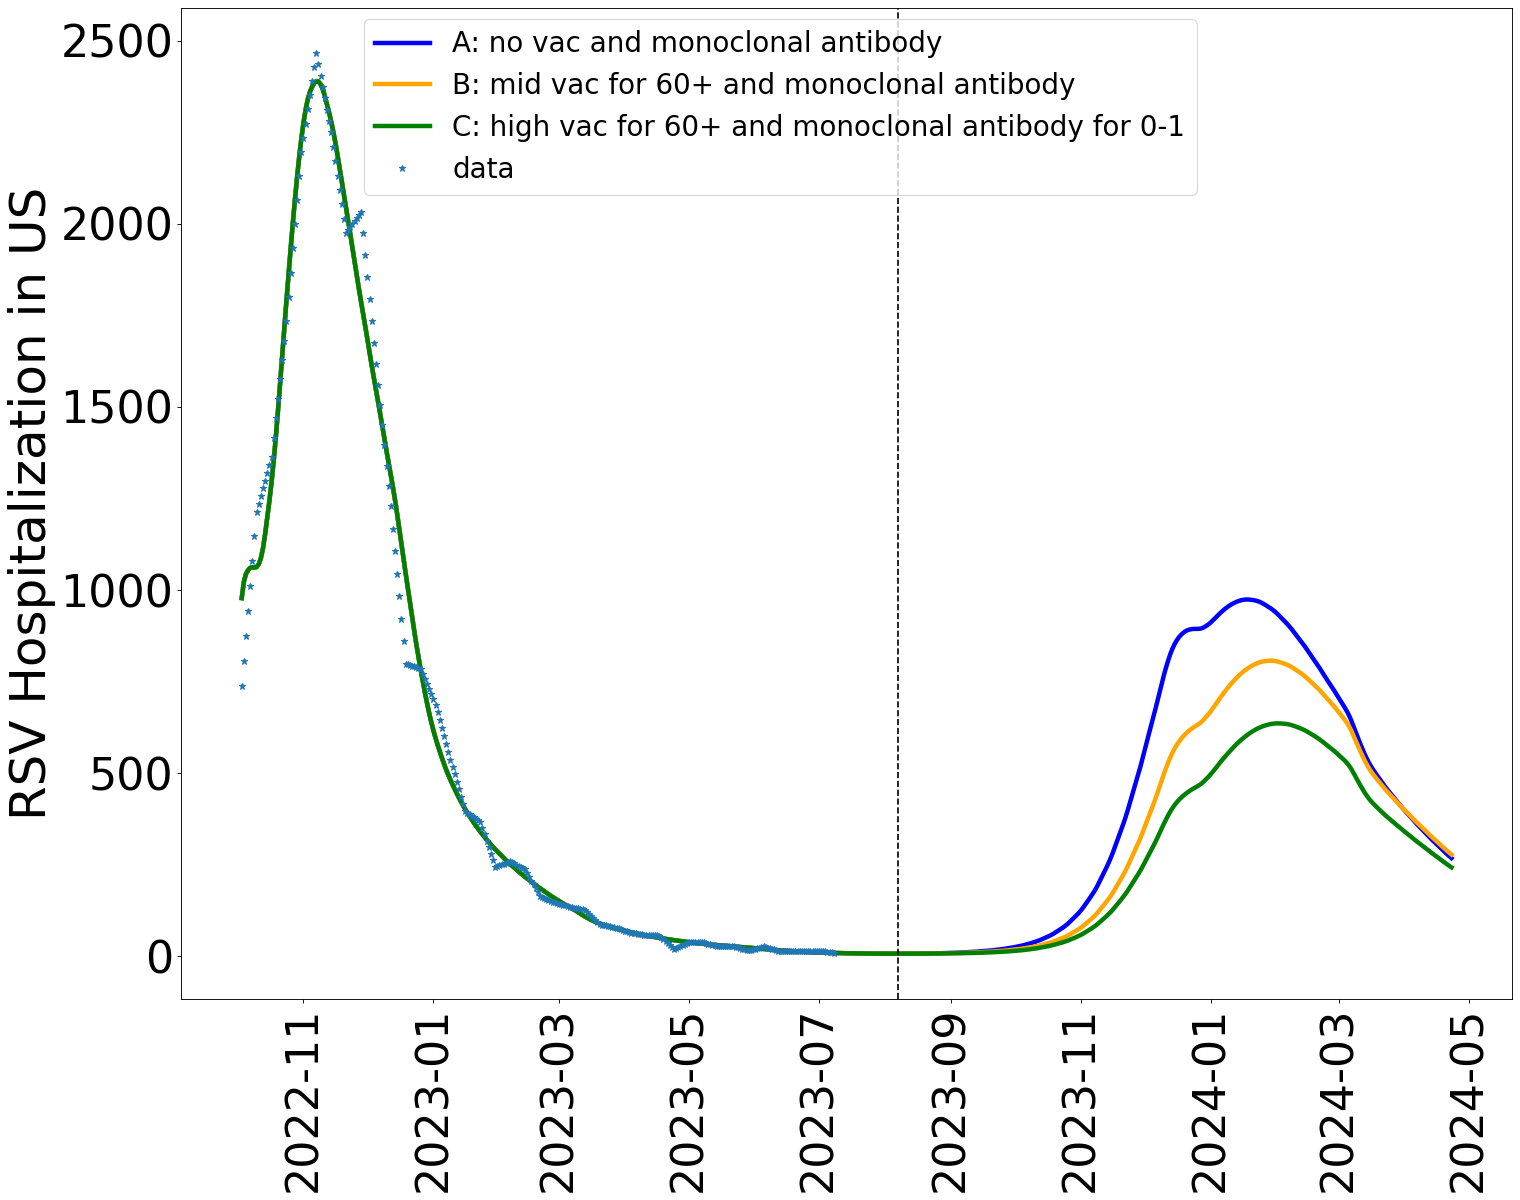

In [82]:
import matplotlib.dates as mdates
drange1 = pd.date_range("2022-10-03", periods=569, freq="1D") # just to show fit ... for projection has to be cahnged accordingly
drange2 = pd.date_range("2022-10-03", periods=279, freq="1D")
drange3 = pd.date_range("2022-10-03", periods=309, freq="1D")
fig = plt.figure(num=None, figsize=(20, 16), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 40})

_=plt.xticks(rotation=90)  

plt.plot(drange1, H_ov_avg2b, 'blue', label = 'A: no vac and monoclonal antibody', lw =4)
plt.plot(drange1, H_ov_avg1a, 'orange', label = 'B: mid vac for 60+ and monoclonal antibody ', lw =4)
plt.plot(drange1, H_ov_avg, 'green', label = 'C: high vac for 60+ and monoclonal antibody for 0-1', lw =4)


plt.plot(drange2, hosp_avg, '*', label = 'data', lw =4)
end_fitting_period = max(drange3)
plt.axvline(end_fitting_period, color='black', linestyle='dashed')


plt.ylabel('RSV Hospitalization in US', fontsize = 45)

legend = plt.legend(loc='center', prop={'size': 25})  # Adjust the font size
# Set the legend's position to the center
legend.set_bbox_to_anchor((0.45, 0.9))
#plt.title('Transmission like 2022-23 RSV season ')
plt.tight_layout()
#plt.savefig('RSV projections post covid test 6 months')


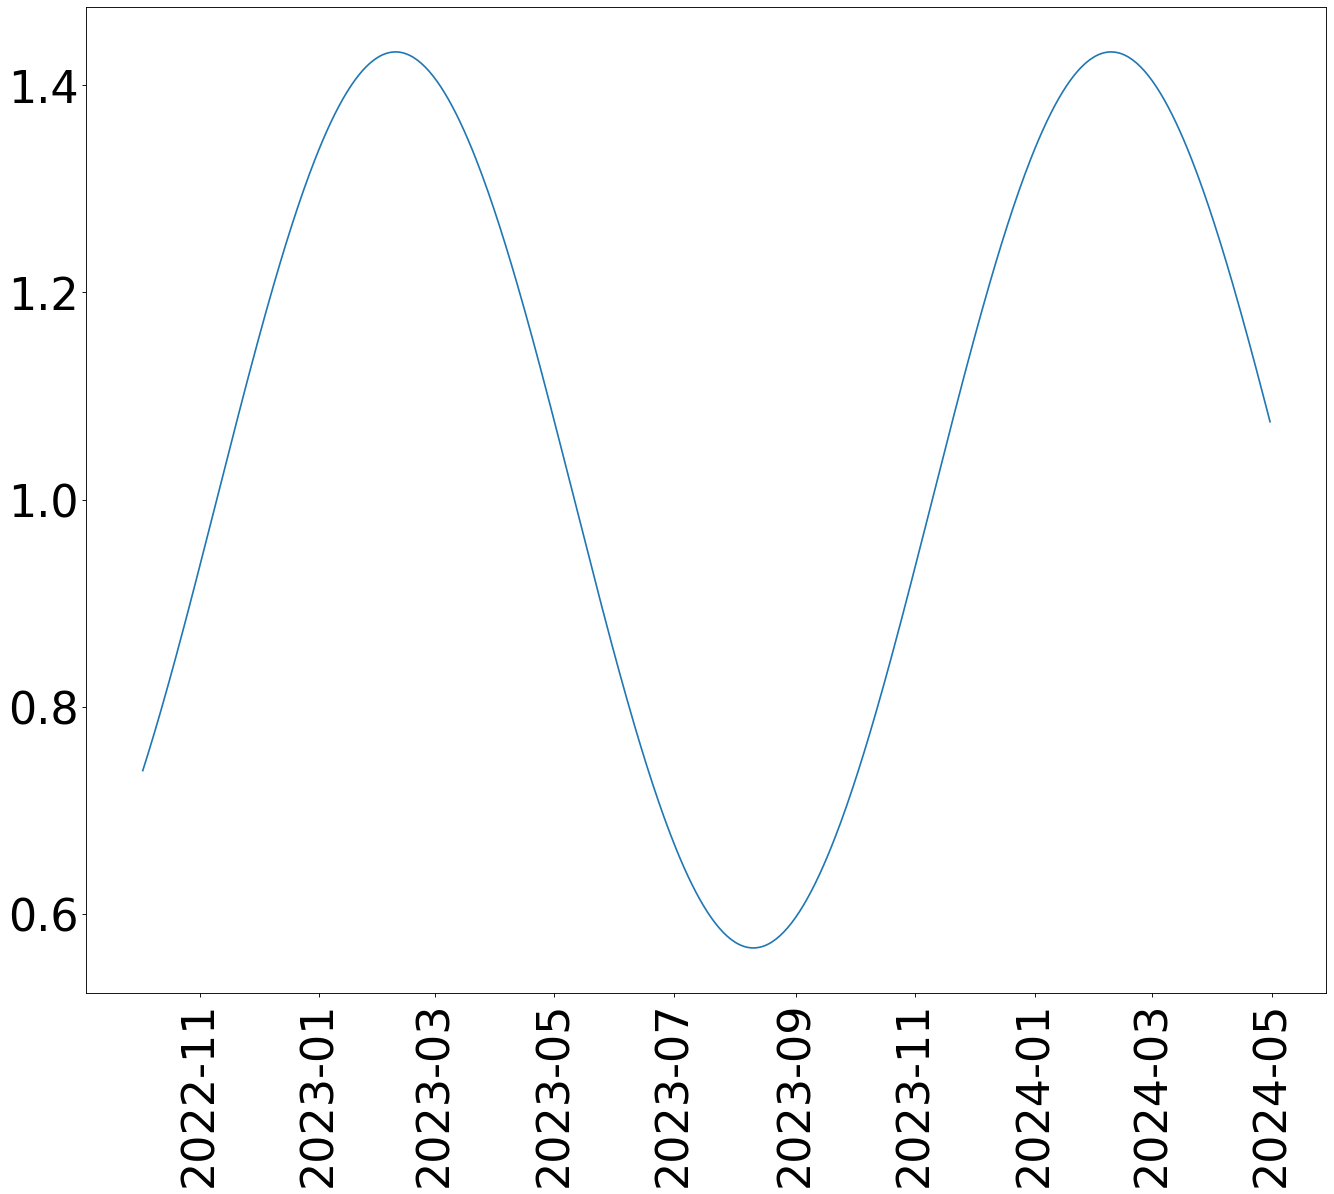

In [327]:
drange4 = pd.date_range("2022-10-03", periods=576, freq="1D")  ## plotting the humidity curve 
fig = plt.figure(num=None, figsize=(20, 16), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 40})
_=plt.xticks(rotation=90) 
plt.plot(drange4,zz2)

In [85]:
def tau_cal(x): ## including stochasticity through tau-leap
    x=int(x)
    if (x>=0):
        tau_leap=int(np.random.poisson(x, 1))
    else:
        tau_leap=int(np.random.poisson(x*(-1), 1))*(-1)
    return tau_leap

In [90]:
def simulation_st(x, popt, param, sc1, sc2, sc3,seed_list):
    
    x0, x01, x02, x03, x04, x05, x06, x1, x2, x3 = popt[0], popt[1], popt[2], popt[3], popt[4], popt[5],  popt[6], popt[7], popt[8],  popt[9]
    k1, k3, cof_b, cof_y, cof_z = param[0], param[1], param[2], param[3], param[4]
    
    Nd = 576 
    dt = 1 #time step
    t = 0  #number of steps
    bita = x0/N

    S = np.zeros([7])
    E = np.zeros([7, ])
    I = np.zeros([7, ])
    H = np.zeros([7, ])
    R = np.zeros([7, ])
    
    
    if (sc2 == 'optImm'):
        M3_0 = set_imm(0)
    if (sc2 == 'pesImm'):
        M3_0 = set_imm(0)
    
    D = np.zeros([7, ])
    M = np.array(M3_0)
    Mv = np.array(M_0)
  
    sigma = 0.00  #0.005
    
     def dW(delta_t):
        #var = 50
        return np.random.normal(loc=0.0, scale=np.sqrt(delta_t))
    
    def g(y, sigma):
        return sigma*(y)
    
    
    case_c = np.zeros([7, ])
    hosp_c = np.zeros([7, ])

    D_new = np.zeros([7, ])  
    
    S_new = np.zeros([7, ])
    E_new = np.zeros([7, ])
    I_new = np.zeros([7, ])
    H_new = np.zeros([7, ])
    R_new = np.zeros([7, ])

    D_age = np.zeros([7, ])
    
    M_new = np.array(M3_0)
    Mv_new = np.zeros([7, ])
        
    case_c_new = np.zeros([7, ])
    hosp_c_new = np.zeros([7, ])
    
    Ic_ov = np.zeros([Nd, ])
    hosp_cc = np.zeros([Nd, ])
    hosp_cc1 = np.zeros([Nd, ])
    hosp_cc2 = np.zeros([Nd, ])
    hosp_cc3 = np.zeros([Nd, ])
    hosp_cc4 = np.zeros([Nd, ])
    hosp_cc5 = np.zeros([Nd, ])
    hosp_cc6 = np.zeros([Nd, ])
    hosp_cc0 = np.zeros([Nd, ])
    
    Ia_ov = np.zeros([Nd, ])
    cum = np.zeros([Nd, ])
    D_ov = np.zeros([Nd, ])
    symp_r = np.zeros([Nd, ])

    S_ov = np.zeros([Nd, ])
    E_ov = np.zeros([Nd, ])
    P_ov = np.zeros([Nd, ])
    I_ov = np.zeros([Nd, ])
    H_ov = np.zeros([Nd, ])
    R_ov = np.zeros([Nd, ])
    M_ov = np.zeros([Nd, 7])
    Mv_ov = np.zeros([Nd, 7])
    symp_rr = np.zeros([Nd, 7])
    M_ovv = np.zeros([Nd, ])
    Mv_ovv = np.zeros([Nd, ])
    Mv_ovv19 = np.zeros([Nd, 7])
    prot = np.zeros([Nd, 7])
    
    bita_s = np.zeros([Nd, ])    
    count = 0

    
    
    E0 = [x2 for n in range(7)]
    I_0 = [x1 for n in range(7)]
    H0 = [x3/6 for n in range(7)]
    
    
    w1 = 1/(6*30) 
    ww = 1/(10)  
    
    D0 = [0/6  for n in Ni]
    S10 = [Ni[n] - E0[n] - I_0[n] - H0[n] - D0[n] for n in range(7)]
    R0 = [0 for n in Ni]  
    S = np.asarray(S10)
    E = np.asarray(E0)
    I = np.asarray(I_0); H = np.asarray(H0); D = np.asarray(D0); R = np.asarray(R0); Mv = np.asarray(M2_0); M = np.asarray(M3_0)
    for tt in range(int(Nd/dt)):
        seed_index=int(seed_list[count])
        np.random.seed(seed_index)
        if (sc2 == "pesImm"):
            Kv_o = [3, 3, 2.33, 2.33, 2.33, 2.33, 2.33] ##### As per literature froo RSV 
            Kvh_o = [0, 0, 4, 4, 4, 4, 4]  #### as per literature for RSV
            K_o = [2.33, 2.33, 2.33, 2.33, 2.33, 2.33, 2.33]# natural imm against flu inf
            Kh_o = [2.33, 2.33, 2.33, 2.33, 2.33, 2.33, 2.33]# natural imm against flu hosp
 



        if (tt*dt<=183):
            w2= (np.log(2))/(6*30)
        if (tt*dt>183 and tt*dt<=365):
            prop1 = (np.sum(H_ov[tt-183:tt-1]))/(np.sum(H_ov[0:tt-1]))
            w2=(prop1*((np.log(2))/(9*30)))+((1-prop1)*((np.log(2))/(1.4*30)))   # calculated exponential decay manually                
        if (tt*dt >=365):
            prop2 = (np.sum(H_ov[tt-183:tt-1]))/(np.sum(H_ov[tt-365:tt-1]))
            w2=(prop2*((np.log(2))/(9*30)))+((1-prop2)*((np.log(2))/(1.4*30)))   
    
        zx = 1
        
        if (tt*dt  < 31):
            bita = zz2[count]*(x0 + (tt*dt)*(x01 - x0)/30)/N
            
        if (tt*dt >= 31 and tt*dt < 61):
            bita = zz2[count]*(x01 + (tt*dt - 30)*(x02 - x01)/30)/N

        if (tt*dt >= 61 and tt*dt < 91):
            sigma = 0.000
            bita = zz2[count]*(x02 + (tt*dt - 60)*(x03 - x02)/30)/N
            
        if (tt*dt >= 91 and tt*dt < 121):
            sigma = 0.000
            bita = zz2[count]*(x03 + (tt*dt - 90)*(x04 - x03)/30)/N
            
        if (tt*dt >= 121 and tt*dt < 151):
            sigma = 0.000
            bita = zz2[count]*(x04 + (tt*dt - 120)*(x05 - x04)/30)/N

    
        if (tt*dt >= 151 and tt*dt < 332):   
            sigma = 0.000
            bita = zz2[count]*(x05 + (tt*dt - 150)*(x06 - x05)/181)/N


        if (tt*dt >= 332):
            if (sc2 == "pesImm"):
                sigma = 0.00
                rnd=np.random.normal(0, 0.0155, 1)
                #x6 = zz2[count]*1*(x0+x02+x04+x06+x01+x03+x05)/(7*N) current season based 
                x6 = zz2[count]*0.038 # pre Covid season based
                bita = (rnd+x6)
            else:
                sigma = 0.00
                rnd=np.random.normal(0, 0.0155, 1) # 0.0155 is the std of the popt 
                #x6 = zz2[count]*1*(x0+x02+x04+x06+x01+x03+x05)/(7*N)
                x6 = zz2[count]*0.038
                bita = (rnd+x6)

                 

        CM = CM_all2
        if (count <= 800):
            if (school[count] == 0):
                CM = CM - CM_s2

            if (work[count] == 0):
                CM = CM - CM_w2 - CM_s2
                
        for i in range(7):      
            S_g  =  g(S[i],sigma)*dW(dt)
            E_g  =  g(E[i],sigma)*dW(dt)
            I_g  =  g(I[i],sigma)*dW(dt)
            H_g = g(H[i],sigma)*dW(dt)              
            R_g = g(R[i],sigma)*dW(dt)  


        if (sc2 == "pesImm"):
            Kv_o = [3, 3, 2.33, 2.33, 2.33, 2.33, 2.33] ##### As per literature froo RSV 
            Kvh_o = [0, 0, 4, 4, 4, 4, 4]  #### as per literature for RSV
            K_o = [2.33, 2.33, 2.33, 2.33, 2.33, 2.33, 2.33]# natural imm against flu inf
            Kh_o = [2.33, 2.33, 2.33, 2.33, 2.33, 2.33, 2.33]# natural imm against flu hosp
       
            
      

        for i in range(7):  
            if (count<=332):
                if (i==0):
                    k1 = (7/N)*(data_dem2[6]/data_dem2[0])  
                else: 
                    k1 = 7/N    
                prot_inf = K_o[i]*M[i] + Kv_o[i]*Mv[i]
                prot_hosp = Kh_o[i]*M[i] + Kvh_o[i]*Mv[i]# protec against hosp 

                S_new[i] = S[i] + dt*(-(bita/(1 + prot_inf))*computerate(i, CM, 1, I, Ni)*S[i] + ww*R[i]) + S_g
                E_new[i] = E[i] + dt*((bita/(1 + prot_inf))*computerate(i, CM, 1, I , Ni)*S[i] - g_E*E[i])  + E_g

                case_c_new[i] = case_c[i] + dt*(g_E*E[i])      
                I_new[i] = I[i] + dt*(g_E*E[i]  - g_Recovery*(IHR[i]/(1 + prot_hosp))*I[i] - g_Recovery*IRec[i]*I[i]) + I_g
                hosp_c_new[i] = hosp_c[i] + dt*(g_Recovery*(IHR[i]/(1 + prot_hosp))*I[i])

                H_new[i] = H[i] + dt*(g_Recovery*(IHR[i]/(1 + prot_hosp))*I[i]  - (zx*HDR[i]*g_hosp/(1 + prot_hosp))*H[i] - g_hosp*HDRec[i]*H[i]) + H_g    
                D_new[i] = D[i] + dt*(zx*HDR[i]*g_hosp/(1 + prot_hosp)*H[i]) 
                R_new[i] = R[i] + dt*( g_hosp*HDRec[i]*H[i] + g_Recovery*IRec[i]*I[i] - ww*R[i]) + R_g

            elif (count>332):
                if (i==0):
                    k1 = (7/N)*(data_dem2[6]/data_dem2[0])  
                else: 
                    k1 = 7/N    
                prot_inf = K_o[i]*M[i] + Kv_o[i]*Mv[i]
                prot_hosp = Kh_o[i]*M[i] + Kvh_o[i]*Mv[i]# protec against hosp 

                S_new[i] = S[i] + (dt*tau_cal(-(bita/(1 + prot_inf))*computerate(i, CM, 1, I, Ni)*S[i])) + (dt*tau_cal(ww*R[i])) + S_g
                E_new[i] = E[i] + (dt*tau_cal((bita/(1 + prot_inf))*computerate(i, CM, 1, I , Ni)*S[i])) - (dt*tau_cal(g_E*E[i]))  + E_g
                
                case_c_new[i] = case_c[i] + (dt*tau_cal(g_E*E[i]))     
                I_new[i] = I[i] + (dt*tau_cal(g_E*E[i]))  - (dt*tau_cal(g_Recovery*(IHR[i]/(1 + prot_hosp))*I[i])) - (dt*tau_cal(g_Recovery*IRec[i]*I[i])) + I_g
                hosp_c_new[i] = hosp_c[i] + (dt*tau_cal(g_Recovery*(IHR[i]/(1 + prot_hosp))*I[i]))

                H_new[i] = H[i] + (dt*tau_cal(g_Recovery*(IHR[i]/(1 + prot_hosp))*I[i]))  - (dt*tau_cal((zx*HDR[i]*g_hosp/(1 + prot_hosp))*H[i])) - (dt*tau_cal(g_hosp*HDRec[i]*H[i])) + H_g    
                D_new[i] = D[i] + (dt*tau_cal(zx*HDR[i]*g_hosp/(1 + prot_hosp)*H[i])) 
                R_new[i] = R[i] + (dt*tau_cal(g_hosp*HDRec[i]*H[i])) + (dt*tau_cal(g_Recovery*IRec[i]*I[i])) - (dt*tau_cal(ww*R[i])) + R_g

            if (count <= 800):

                if (sc1 == 'high'):
                    vacc_ref = vacc_1 # for projections 

                elif (sc1 == 'mid'):
                    vacc_ref = vacc_2 # for projections 

                else:
                    vacc_ref = vacc_3 # for projections 

                Mv_new[i] = Mv[i] + dt*(- w1*Mv[i] + k1*vacc_ref[i, count])
                M_new[i] = M[i] + dt * (-w2 * M[i] + k3 * R[i] / prot_inf) 
                prot[count,i] = (1/(1+prot_inf))


        
                            
        S = S_new; E = E_new; I = I_new; case_c = case_c_new; hosp_c = hosp_c_new; H = H_new; D = D_new; R = R_new; M = M_new; Mv = Mv_new; #M1 = M1_new;
        if(tt % int(1/dt) == 0):

            for i in range(7):
                Mv_ovv19[count, i] = Mv[i]
                

            bita_s[count] = bita    
            Ic_ov[count] = np.sum(case_c)
            D_ov[count] = np.sum(D)
            S_ov[count] = np.sum(S)
            cum[count] = np.sum(case_c)
            hosp_cc[count] = np.sum(hosp_c)
            hosp_cc0[count] = hosp_c[0]
            hosp_cc1[count] = hosp_c[1]
            hosp_cc2[count] = hosp_c[2]
            hosp_cc3[count] = hosp_c[3]
            hosp_cc4[count] = hosp_c[4]
            hosp_cc5[count] = hosp_c[5]
            hosp_cc6[count] = hosp_c[6]
            
            Mv_ovv[count] = np.sum(np.array(data_dem2)*np.array(Mv))/N
            M_ovv[count] = np.sum(np.array(data_dem2)*np.array(M))/N
                
            
            E_ov[count] = np.sum(E)
            I_ov[count] = np.sum(I+H)
            H_ov[count] = np.sum(H)
            R_ov[count] = np.sum(R)
            count = count+1
 
    
    D_age = np.sum(D)      
    D2_ova = cum_to_active(Ic_ov)
    H_ova = cum_to_active(hosp_cc)
    H_ova0 = cum_to_active(hosp_cc0)
    H_ova1 = cum_to_active(hosp_cc1)
    H_ova2 = cum_to_active(hosp_cc2)
    H_ova3 = cum_to_active(hosp_cc3)
    H_ova4 = cum_to_active(hosp_cc4)
    H_ova5 = cum_to_active(hosp_cc5)
    H_ova6 = cum_to_active(hosp_cc6)
    D3_ova = cum_to_active(D_ov)
    I_ov_avg = np.zeros([Nd-7, ])
    D_ov_avg = np.zeros([Nd-7, ])
    H_ov_avg = np.zeros([Nd-7, ])
    H_ov_avg0 = np.zeros([Nd-7, ])
    H_ov_avg1 = np.zeros([Nd-7, ])
    H_ov_avg2 = np.zeros([Nd-7, ])
    H_ov_avg3 = np.zeros([Nd-7, ])
    H_ov_avg4 = np.zeros([Nd-7, ])
    H_ov_avg5 = np.zeros([Nd-7, ])
    H_ov_avg6 = np.zeros([Nd-7, ])
    for i in range(Nd-7):
        
        I_ov_avg[i] = max(np.mean(D2_ova[i:i+7]), 0)
        D_ov_avg[i] = max(np.mean(D3_ova[i:i+7]), 0)
        H_ov_avg[i] = max(np.mean(H_ova[i:i+7]), 0)
        H_ov_avg0[i] = max(np.mean(H_ova0[i:i+7]), 0)
        H_ov_avg1[i] = max(np.mean(H_ova1[i:i+7]), 0)
        H_ov_avg2[i] = max(np.mean(H_ova2[i:i+7]), 0)
        H_ov_avg3[i] = max(np.mean(H_ova3[i:i+7]), 0)
        H_ov_avg4[i] = max(np.mean(H_ova4[i:i+7]), 0)
        H_ov_avg5[i] = max(np.mean(H_ova5[i:i+7]), 0)
        H_ov_avg6[i] = max(np.mean(H_ova6[i:i+7]), 0)

   
 
  
    return I_ov_avg, D_ov_avg, H_ov_avg, D2_ova, Mv_ovv19, M_ovv, Mv_ovv, S_ov, E_ov, bita_s, R_ov, I_ov,prot,H_ov_avg0,H_ov_avg1,H_ov_avg2,H_ov_avg3,H_ov_avg4,H_ov_avg5, H_ov_avg6                        

In [91]:
from numpy import genfromtxt ## generated seed table for respective comparison insteead of tptally random 
seed_table= genfromtxt('seed.csv', delimiter=',')


In [92]:
def sim_scenario(scen, param_0): # FOR POST COVID SCEBARIO
    Nsim = 200
    #popt = np.loadtxt('fit_param_new_RSV/'+state+'/popt_post.csv', delimiter=',')
    popt = np.loadtxt('fit_param_new_RSV/'+state+'/popt_pre.csv', delimiter=',')
    param = param_0
    if (scen == "A"):
        sc1 = 'low'           
        sc2 = 'pesImm'
        sc3 = "vacc_3"
        print('scenario ',scen, 'loaded') 
        
    if (scen == "B"):
        sc1 = 'mid'           
        sc2 = 'pesImm'
        sc3 = "vacc_2"
        print('scenario ',scen, 'loaded') 
        
    if (scen == "C"):
        sc1 = 'high'           
        sc2 = 'pesImm'
        sc3 = "vacc_1"
        print('scenario ',scen, 'loaded') 
        
    print('fitting completed', scen)         
    new_hosp = np.zeros([569, Nsim])
    new_hosp0 = np.zeros([569, Nsim]) 
    new_hosp1 = np.zeros([569, Nsim])
    new_hosp2 = np.zeros([569, Nsim])
    new_hosp3 = np.zeros([569, Nsim])
    new_hosp4 = np.zeros([569, Nsim])
    new_hosp5 = np.zeros([569, Nsim])
    new_hosp6 = np.zeros([569, Nsim])
    seed_list=np.zeros([576,1])
    for i in range(Nsim):
        seed_list = seed_table[i,:]
        I_ov_avg, D_ov_avg, H_ov_avg, D2_ova, Mv_ovv19, M_ovv, Mv_ovv, S_ov, E_ov, bita_s, R_ov, I_ov,prot,H_ov_avg0,H_ov_avg1,H_ov_avg2,H_ov_avg3,H_ov_avg4,H_ov_avg5, H_ov_avg6 =  simulation_st(0, popt, param, sc1, sc2, sc3,seed_list)                    
        
        new_hosp[:,i] = H_ov_avg
        
        new_hosp0[:,i] = H_ov_avg0
        new_hosp1[:,i] = H_ov_avg1
        new_hosp2[:,i] = H_ov_avg2
        new_hosp3[:,i] = H_ov_avg3
        new_hosp4[:,i] = H_ov_avg4
        new_hosp5[:,i] = H_ov_avg5
        new_hosp6[:,i] = H_ov_avg6
               

    print("computing percentiles for, ", scen)
    new_hosp_p = np.zeros([569, 25]) 
    new_hosp_p0 = np.zeros([569, 25]) 
    new_hosp_p1 = np.zeros([569, 25]) 
    new_hosp_p2 = np.zeros([569, 25]) 
    new_hosp_p3 = np.zeros([569, 25]) 
    new_hosp_p4 = np.zeros([569, 25])
    new_hosp_p5 = np.zeros([569, 25]) 
    new_hosp_p6 = np.zeros([569, 25]) 
    

    for i in range(569):
        new_hosp_p[i,:] = np.percentile(new_hosp[i,:], [0, 100*0.01, 100*0.025, 100*0.05, 100*0.1, 100*0.15, 100*0.2, 100*0.25, 100*0.3, 100*0.35, 100*0.4, 100*0.45, 100*0.5, 100*0.55, 100*0.6, 100*0.65, 100*0.7, 100*0.75, 100*0.8, 100*0.85, 100*0.9, 100*0.95, 100*0.975, 100*0.99, 100]) 
        new_hosp_p0[i,:] = np.percentile(new_hosp0[i,:], [0, 100*0.01, 100*0.025, 100*0.05, 100*0.1, 100*0.15, 100*0.2, 100*0.25, 100*0.3, 100*0.35, 100*0.4, 100*0.45, 100*0.5, 100*0.55, 100*0.6, 100*0.65, 100*0.7, 100*0.75, 100*0.8, 100*0.85, 100*0.9, 100*0.95, 100*0.975, 100*0.99, 100])
        new_hosp_p1[i,:] = np.percentile(new_hosp1[i,:], [0, 100*0.01, 100*0.025, 100*0.05, 100*0.1, 100*0.15, 100*0.2, 100*0.25, 100*0.3, 100*0.35, 100*0.4, 100*0.45, 100*0.5, 100*0.55, 100*0.6, 100*0.65, 100*0.7, 100*0.75, 100*0.8, 100*0.85, 100*0.9, 100*0.95, 100*0.975, 100*0.99, 100])
        new_hosp_p2[i,:] = np.percentile(new_hosp2[i,:], [0, 100*0.01, 100*0.025, 100*0.05, 100*0.1, 100*0.15, 100*0.2, 100*0.25, 100*0.3, 100*0.35, 100*0.4, 100*0.45, 100*0.5, 100*0.55, 100*0.6, 100*0.65, 100*0.7, 100*0.75, 100*0.8, 100*0.85, 100*0.9, 100*0.95, 100*0.975, 100*0.99, 100])
        new_hosp_p3[i,:] = np.percentile(new_hosp3[i,:], [0, 100*0.01, 100*0.025, 100*0.05, 100*0.1, 100*0.15, 100*0.2, 100*0.25, 100*0.3, 100*0.35, 100*0.4, 100*0.45, 100*0.5, 100*0.55, 100*0.6, 100*0.65, 100*0.7, 100*0.75, 100*0.8, 100*0.85, 100*0.9, 100*0.95, 100*0.975, 100*0.99, 100])
        new_hosp_p4[i,:] = np.percentile(new_hosp4[i,:], [0, 100*0.01, 100*0.025, 100*0.05, 100*0.1, 100*0.15, 100*0.2, 100*0.25, 100*0.3, 100*0.35, 100*0.4, 100*0.45, 100*0.5, 100*0.55, 100*0.6, 100*0.65, 100*0.7, 100*0.75, 100*0.8, 100*0.85, 100*0.9, 100*0.95, 100*0.975, 100*0.99, 100])
        new_hosp_p5[i,:] = np.percentile(new_hosp5[i,:], [0, 100*0.01, 100*0.025, 100*0.05, 100*0.1, 100*0.15, 100*0.2, 100*0.25, 100*0.3, 100*0.35, 100*0.4, 100*0.45, 100*0.5, 100*0.55, 100*0.6, 100*0.65, 100*0.7, 100*0.75, 100*0.8, 100*0.85, 100*0.9, 100*0.95, 100*0.975, 100*0.99, 100])
        new_hosp_p6[i,:] = np.percentile(new_hosp6[i,:], [0, 100*0.01, 100*0.025, 100*0.05, 100*0.1, 100*0.15, 100*0.2, 100*0.25, 100*0.3, 100*0.35, 100*0.4, 100*0.45, 100*0.5, 100*0.55, 100*0.6, 100*0.65, 100*0.7, 100*0.75, 100*0.8, 100*0.85, 100*0.9, 100*0.95, 100*0.975, 100*0.99, 100])

        
    return new_hosp_p, new_hosp_p0, new_hosp_p1, new_hosp_p2, new_hosp_p3, new_hosp_p4, new_hosp_p5, new_hosp_p6,new_hosp, new_hosp0, new_hosp1, new_hosp2, new_hosp3, new_hosp4, new_hosp5, new_hosp6

In [93]:
param = [k1, k3, cof_b, cof_y, cof_z]
xdata = np.linspace(0, 279, 279)
ydata = hosp_avg
new_hosp_p_A, new_hosp_p0_A, new_hosp_p1_A, new_hosp_p2_A, new_hosp_p3_A, new_hosp_p4_A, new_hosp_p5_A, new_hosp_p6_A,new_hosp_A, new_hosp0_A, new_hosp1_A, new_hosp2_A, new_hosp3_A, new_hosp4_A, new_hosp5_A, new_hosp6_A  = sim_scenario('A', param)
new_hosp_p_B, new_hosp_p0_B, new_hosp_p1_B, new_hosp_p2_B, new_hosp_p3_B, new_hosp_p4_B, new_hosp_p5_B, new_hosp_p6_B,new_hosp_B, new_hosp0_B, new_hosp1_B, new_hosp2_B, new_hosp3_B, new_hosp4_B, new_hosp5_B, new_hosp6_B = sim_scenario('B', param)
new_hosp_p_C, new_hosp_p0_C, new_hosp_p1_C, new_hosp_p2_C, new_hosp_p3_C, new_hosp_p4_C, new_hosp_p5_C, new_hosp_p6_C,new_hosp_C, new_hosp0_C, new_hosp1_C, new_hosp2_C, new_hosp3_C, new_hosp4_C, new_hosp5_C, new_hosp6_C = sim_scenario('C', param)



scenario  A loaded
fitting completed A
computing percentiles for,  A
scenario  B loaded
fitting completed B
computing percentiles for,  B
scenario  C loaded
fitting completed C
computing percentiles for,  C


In [94]:
Save_par = [k1, k3, cof_b, cof_y, cof_z]
np.savetxt('fit_param_new_RSV/'+state+'/popt_pre.csv', popt, delimiter=',')
np.savetxt('fit_param_new_RSV/'+state+'/param_pre.csv', Save_par, delimiter=',')
np.savetxt('fit_param_new_RSV/'+state+'/M2_0_pre.csv', M2_0, delimiter=',')
np.savetxt('fit_param_new_RSV/'+state+'/M3_0_pre.csv', M3_0, delimiter=',')


#np.savetxt('fit_param_new_RSV/'+state+'/popt_post.csv', popt, delimiter=',')
#np.savetxt('fit_param_new_RSV/'+state+'/param_post.csv', Save_par, delimiter=',')
#np.savetxt('fit_param_new_RSV/'+state+'/M2_0_post.csv', M2_0, delimiter=',')
#np.savetxt('fit_param_new_RSV/'+state+'/M3_0_post.csv', M3_0, delimiter=',')

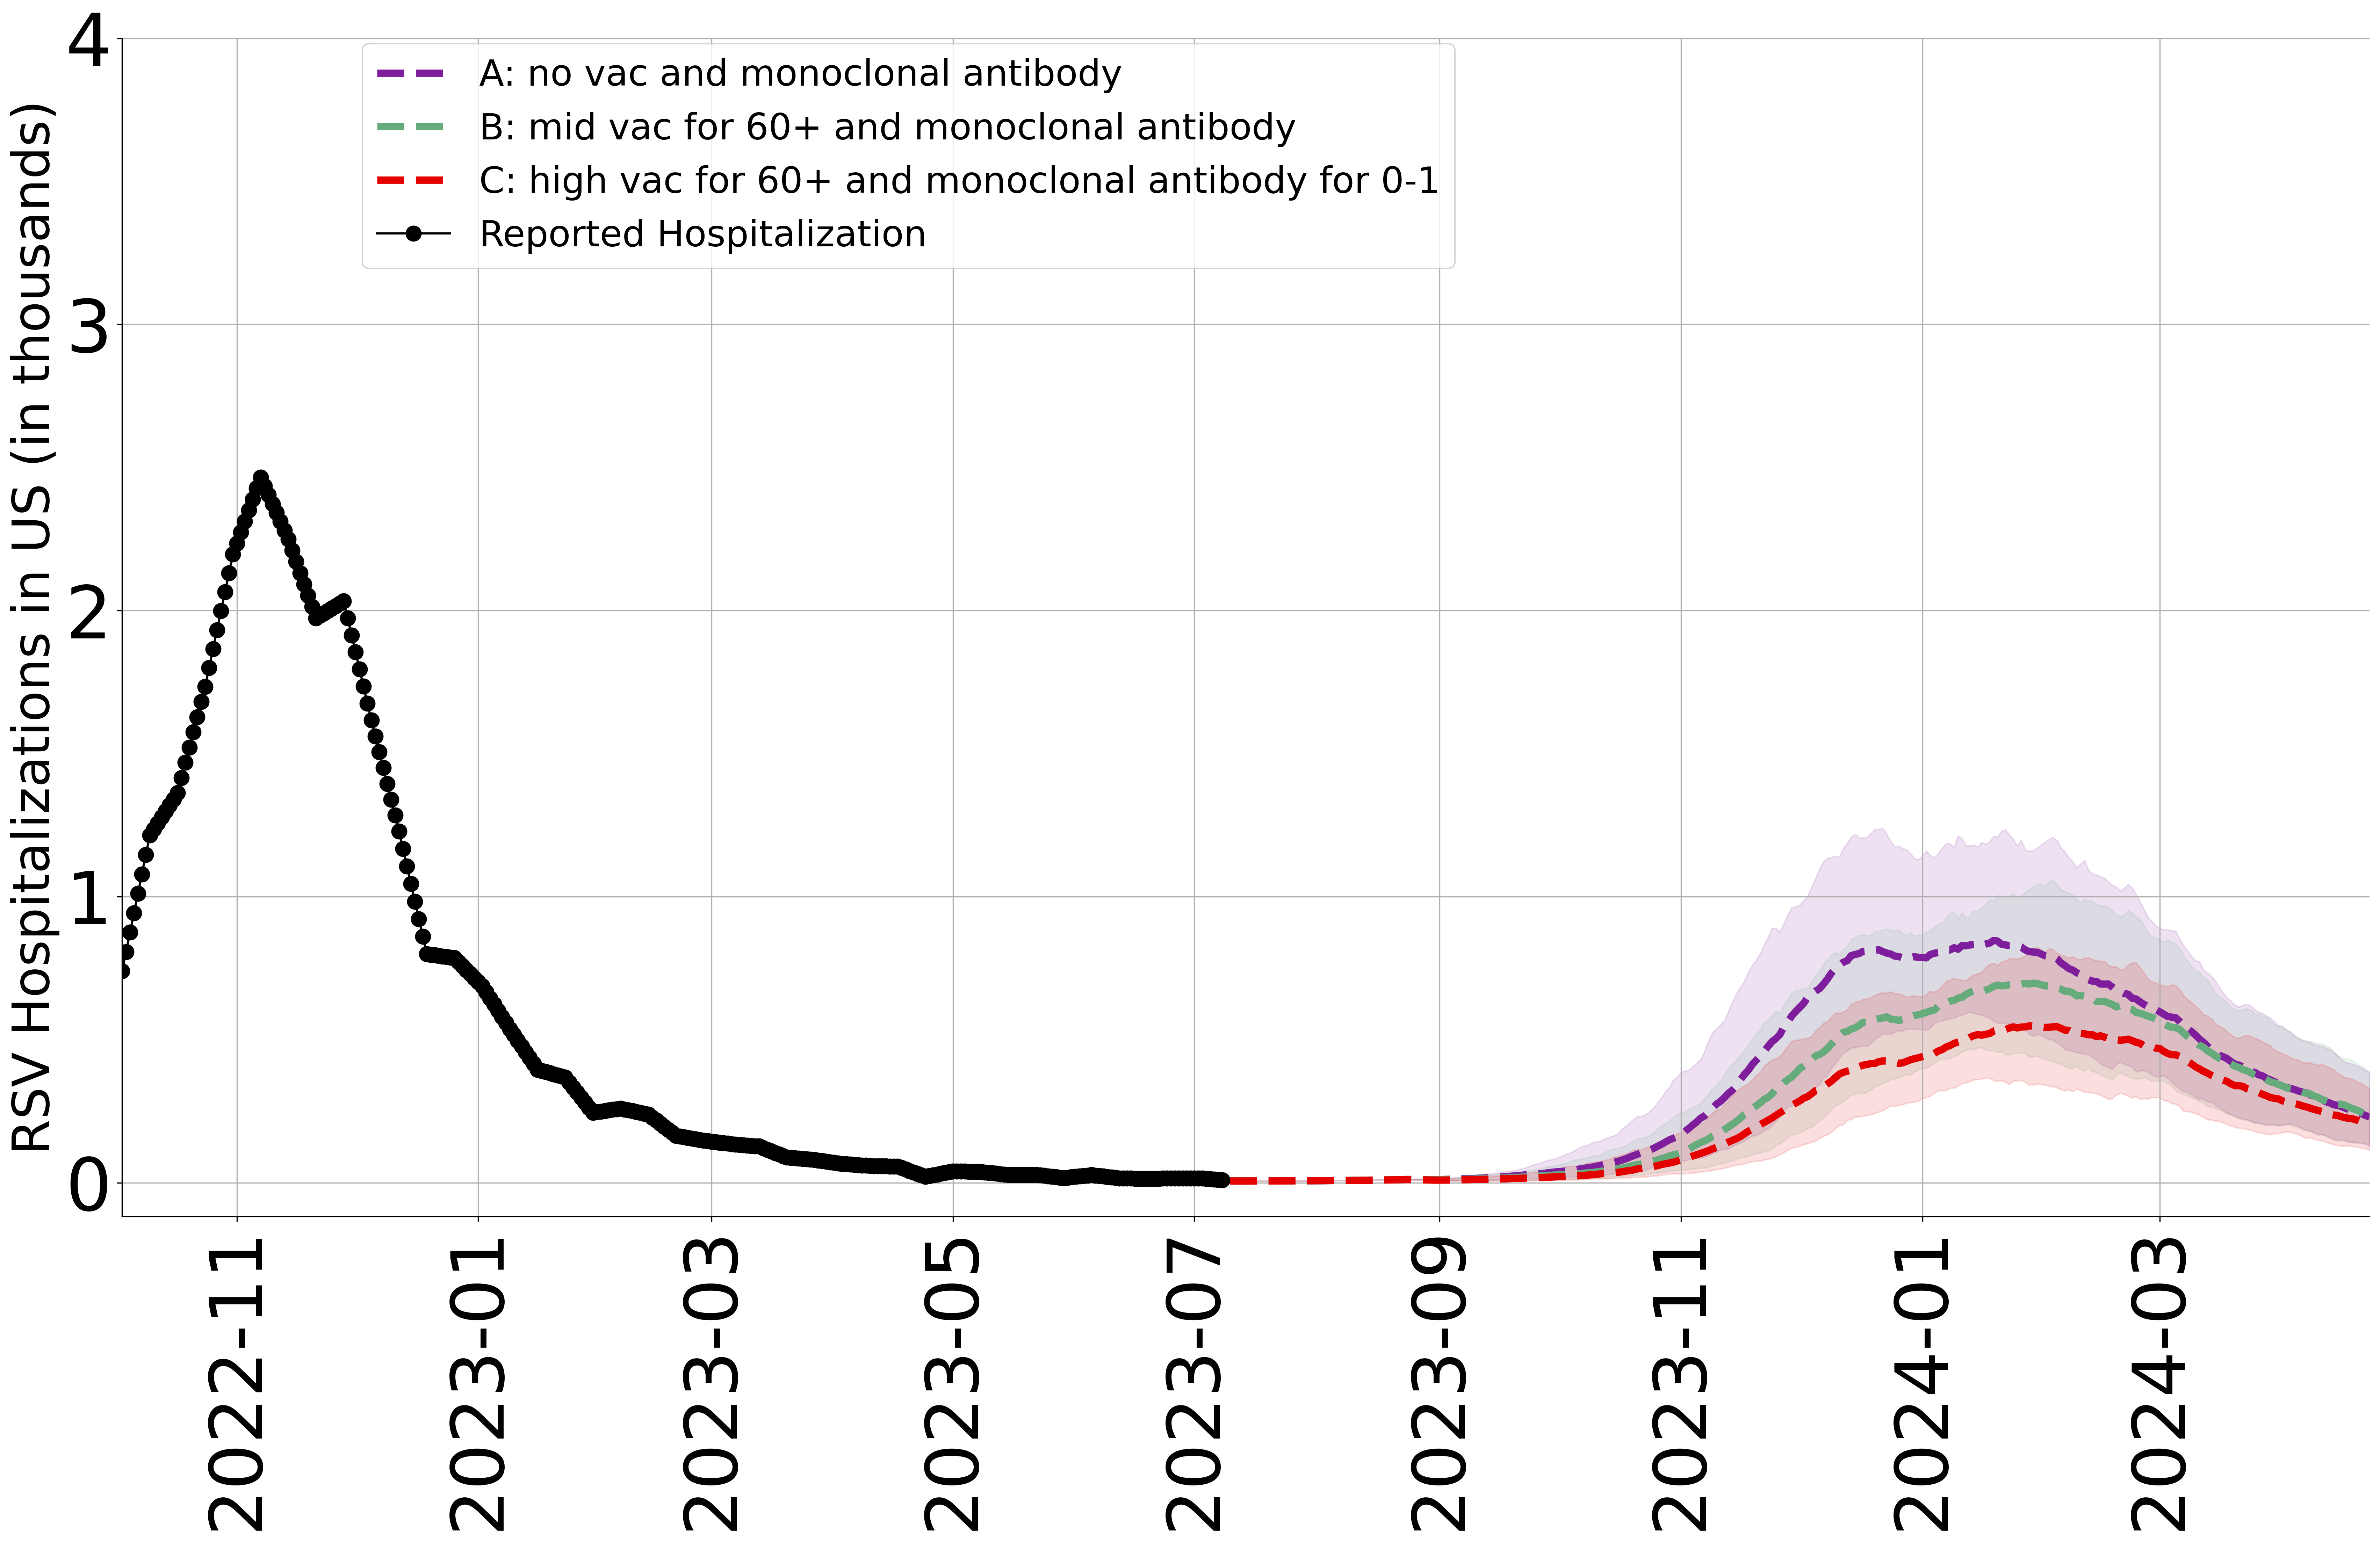

In [794]:
drange2 = pd.date_range("2022-10-03", periods=279, freq="1D")
drange3 = pd.date_range("2022-10-03", periods=309, freq="1D")
drange1 = pd.date_range("2023-07-10", periods=289, freq="1D")

fig = plt.figure(num=None, figsize=(24, 16), dpi=300, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 50})

plt.fill_between(drange1, new_hosp_p_A[280:569,2], new_hosp_p_A[280:569,22], color='xkcd:purple', alpha=0.13)
plt.plot(drange1, new_hosp_p_A[280:569,12], '--', color='xkcd:purple', lw=5, label = 'A: no vac and monoclonal antibody')


plt.fill_between(drange1, new_hosp_p_B[280:569,2], new_hosp_p_B[280:569,22], color='xkcd:tea', alpha=0.13)
plt.plot(drange1, new_hosp_p_B[280:569,12], '--', color='xkcd:tea', lw=5, label = 'B: mid vac for 60+ and monoclonal antibody')


plt.fill_between(drange1, new_hosp_p_C[280:569,2], new_hosp_p_C[280:569,22], color='xkcd:red', alpha=0.13)
plt.plot(drange1, new_hosp_p_C[280:569,12], '--', color='xkcd:red', lw=5, label = 'C: high vac for 60+ and monoclonal antibody for 0-1')


plt.plot(drange2, hosp_avg, 'k-o', markersize=10,label = 'Reported Hospitalization')


plt.xticks(rotation=90)

plt.ylabel('RSV Hospitalizations in US (in thousands)',fontsize=35)
plt.legend(fontsize=20);
legend = plt.legend(loc='center', prop={'size': 25})  # Adjust the font size
# Set the legend's position to the center
legend.set_bbox_to_anchor((0.35, 0.9))
plt.autoscale(enable=True, axis='x', tight=True) 
plt.grid() 
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False) 
plt.yticks([0, 1000, 2000, 3000, 4000], ["0", "1", "2", "3", "4"])
plt.tight_layout()
plt.savefig('RSV_Hospitalizations pre scenario NEWEST seasonality updated.jpeg')

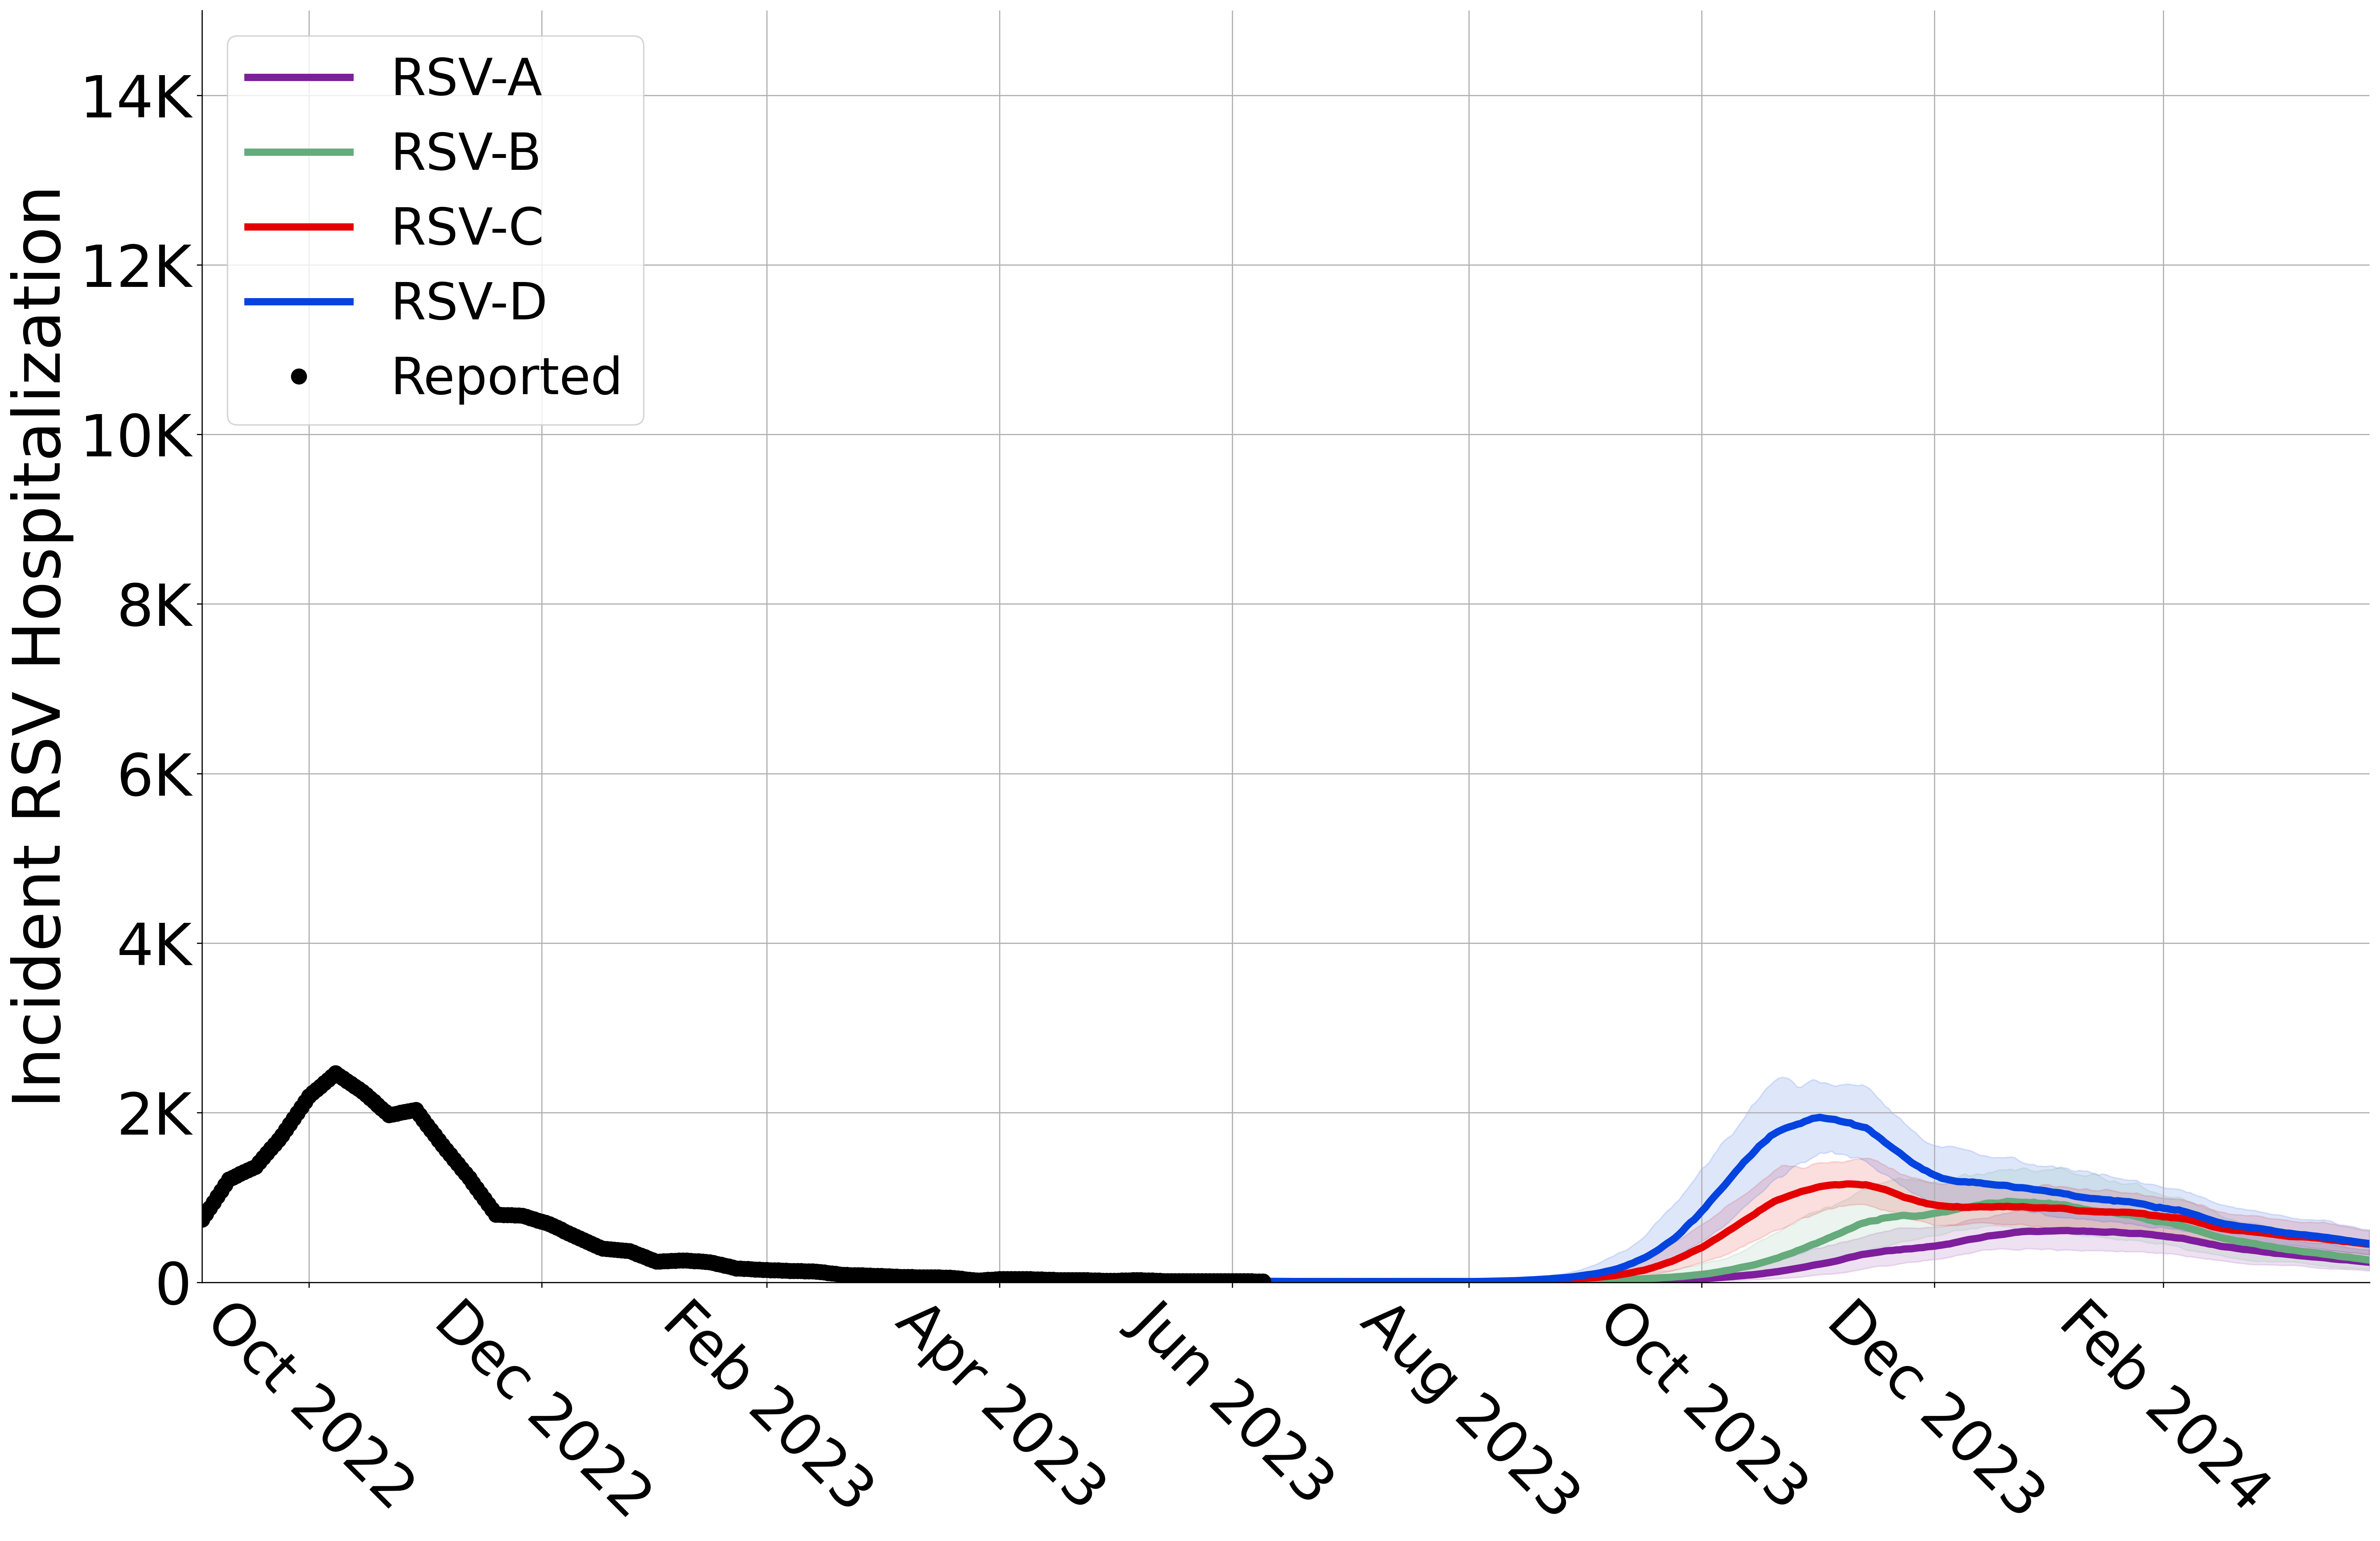

In [152]:
from matplotlib.lines import Line2D
drange2 = pd.date_range("2022-10-03", periods=279, freq="1D")
drange3 = pd.date_range("2022-10-03", periods=309, freq="1D")
drange1 = pd.date_range("2023-07-10", periods=289, freq="1D")
drange4 = pd.date_range("2023-07-10", periods=309, freq="1D")

fig = plt.figure(num=None, figsize=(24, 16), dpi=300, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 50})


plt.fill_between(drange1, new_hosp_p_C[280:569,2]/1000, new_hosp_p_C[280:569,22]/1000, color='xkcd:purple', alpha=0.13)
plt.plot(drange1, new_hosp_p_C[280:569,12]/1000, '-', color='xkcd:purple', lw=5, label = 'RSV-A')#: high intervention (like pre-COVID)

plt.fill_between(drange1, new_hosp_p_A[280:569,2]/1000, new_hosp_p_A[280:569,22]/1000, color='xkcd:tea', alpha=0.13)
plt.plot(drange1, new_hosp_p_A[280:569,12]/1000, '-', color='xkcd:tea', lw=5, label = 'RSV-B')#: low intervention (like pre-COVID )

plt.fill_between(drange1, C1_low[280:569]/1000, C3_low[280:569]/1000, color='xkcd:red', alpha=0.13)
plt.plot(drange1, C2_low[280:569]/1000, '-', color='xkcd:red', lw=5, label = 'RSV-C')#: high intervention (like 22-23 season)


plt.fill_between(drange1, A1_low[280:569]/1000, A3_low[280:569]/1000, color='xkcd:blue', alpha=0.13)
plt.plot(drange1, A2_low[280:569]/1000, '-', color='xkcd:blue', lw=5, label = 'RSV-D')#: low intervention (like 22-23 season)



plt.plot(drange2, hosp_avg/1000, 'k-o', markersize=10,label = 'Reported')

x_ticks = pd.date_range(start="2022-10-03", end="2024-05-03", freq='2M')  # 2-month frequency
x_tick_labels = [x.strftime("%b %Y") for x in x_ticks]

legend_lines = [Line2D([0], [0], color='xkcd:purple', linestyle='-', lw=5),
                Line2D([0], [0], color='xkcd:tea', linestyle='-', lw=5),
                Line2D([0], [0], color='xkcd:red', linestyle='-', lw=5),
                Line2D([0], [0], color='xkcd:blue', linestyle='-', lw=5),
                Line2D([0], [0], marker='o', markersize=10, color='black',linestyle='-', lw=0)]
plt.xticks(x_ticks, x_tick_labels, rotation = -45, fontsize=40) 
plt.ylim(0, 15)
plt.ylabel('Incident RSV Hospitalization',fontsize=45)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False) 
plt.legend(handles=legend_lines,labels=['RSV-A','RSV-B', 'RSV-C', 'RSV-D','Reported'], fontsize=35, loc='upper left')
plt.autoscale(enable=True, axis='x', tight=True)
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.yticks([0, 2, 4, 6, 8, 10, 12, 14], ["0",  "2K", "4K", "6K", "8K", "10K", "12K", "14K"],fontsize=40)

plt.tight_layout()
plt.savefig('RSV_Hospitalizations prepost 4 scenarios final newjpeg')

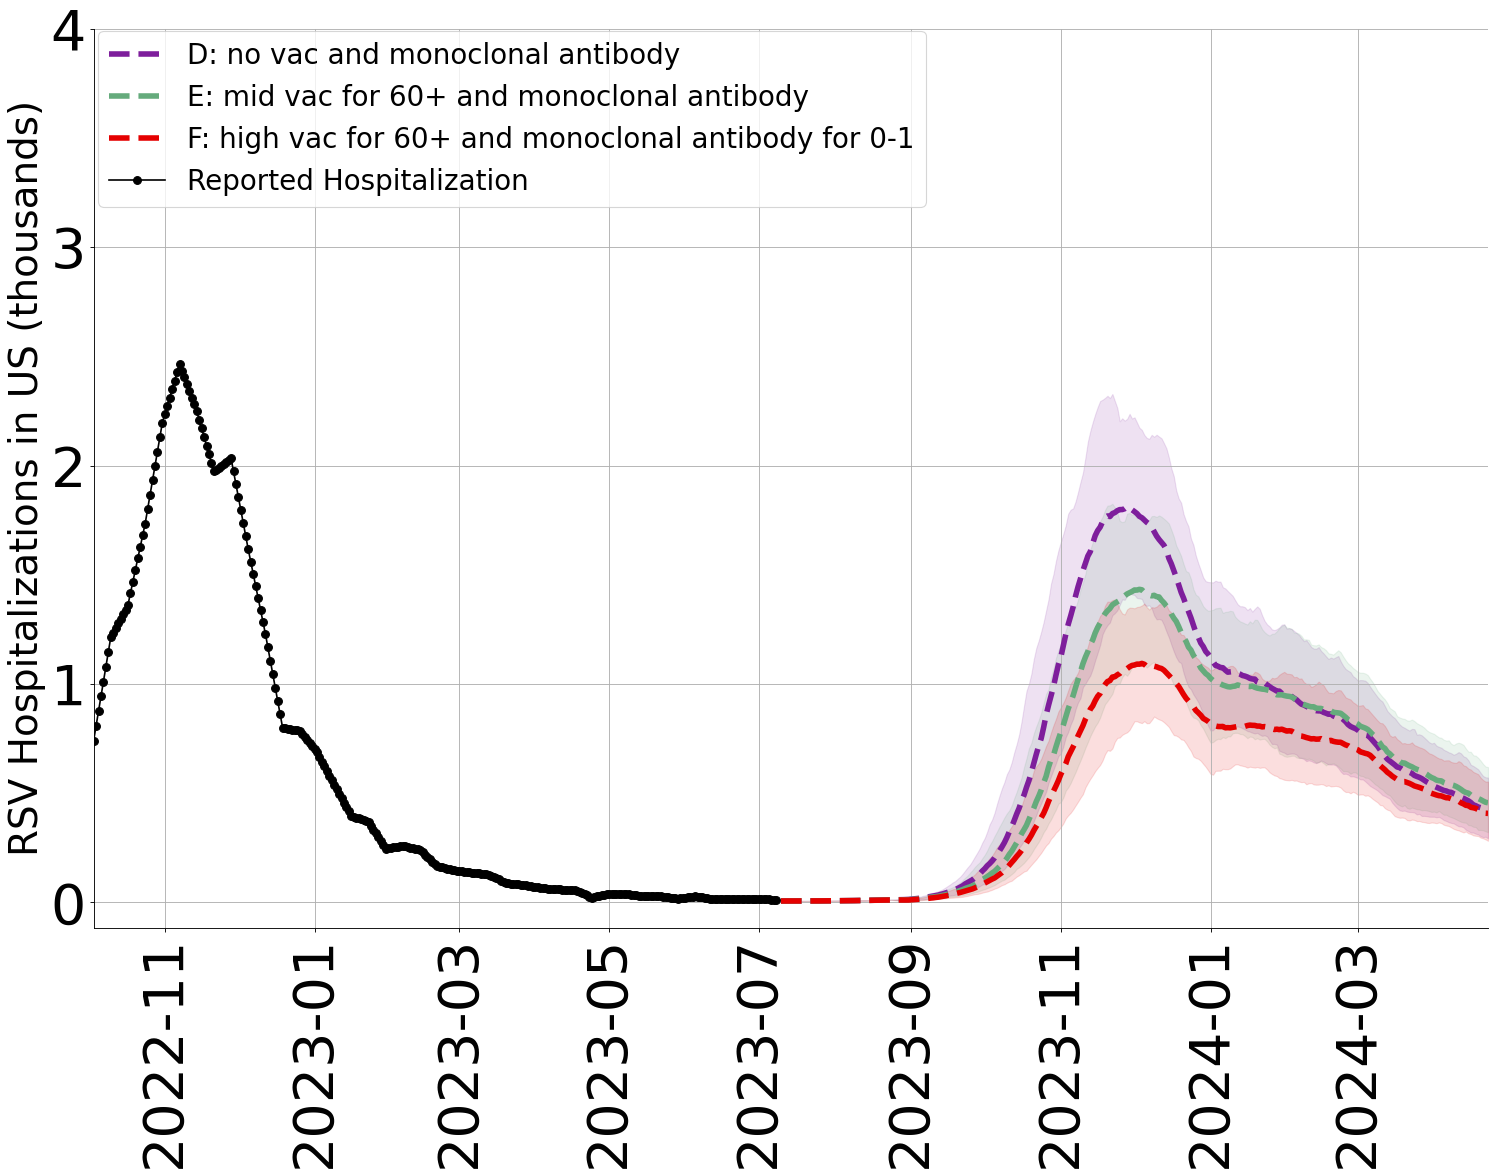

In [761]:
#drange1 = pd.date_range("2022-10-03", periods=569, freq="1D") # just to show fit ... for projection has to be cahnged accordingly
drange2 = pd.date_range("2022-10-03", periods=279, freq="1D")
drange3 = pd.date_range("2022-10-03", periods=309, freq="1D")
drange1 = pd.date_range("2023-07-10", periods=289, freq="1D")
fig = plt.figure(num=None, figsize=(20, 16), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 50})

plt.fill_between(drange1, new_hosp_p_A[280:569,2], new_hosp_p_A[280:569,22], color='xkcd:purple', alpha=0.13)
plt.plot(drange1, new_hosp_p_A[280:569,12], '--', color='xkcd:purple', lw=5, label = 'D: no vac and monoclonal antibody')

plt.fill_between(drange1, new_hosp_p_B[280:569,2], new_hosp_p_B[280:569,22], color='xkcd:tea', alpha=0.13)
plt.plot(drange1, new_hosp_p_B[280:569,12], '--', color='xkcd:tea', lw=5, label = 'E: mid vac for 60+ and monoclonal antibody')


plt.fill_between(drange1, new_hosp_p_C[280:569,2], new_hosp_p_C[280:569,22], color='xkcd:red', alpha=0.13)
plt.plot(drange1, new_hosp_p_C[280:569,12], '--', color='xkcd:red', lw=5, label = 'F: high vac for 60+ and monoclonal antibody for 0-1')



plt.plot(drange2, hosp_avg, 'k-o', markersize=7,label = 'Reported Hospitalization')


plt.xticks(rotation=90)

plt.ylabel('RSV Hospitalizations in US (thousands)',fontsize=35)
plt.legend(fontsize=40);
legend = plt.legend(loc='center', prop={'size': 25}) 
legend.set_bbox_to_anchor((0.3, 0.9))
plt.autoscale(enable=True, axis='x', tight=True) 
plt.grid() 
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False) 
plt.yticks([0, 1000, 2000, 3000, 4000], ["0", "1", "2", "3", "4"])
plt.tight_layout()
plt.savefig('RSV_Hospitalizations post scenario NEWEST seasonality updated.jpeg')

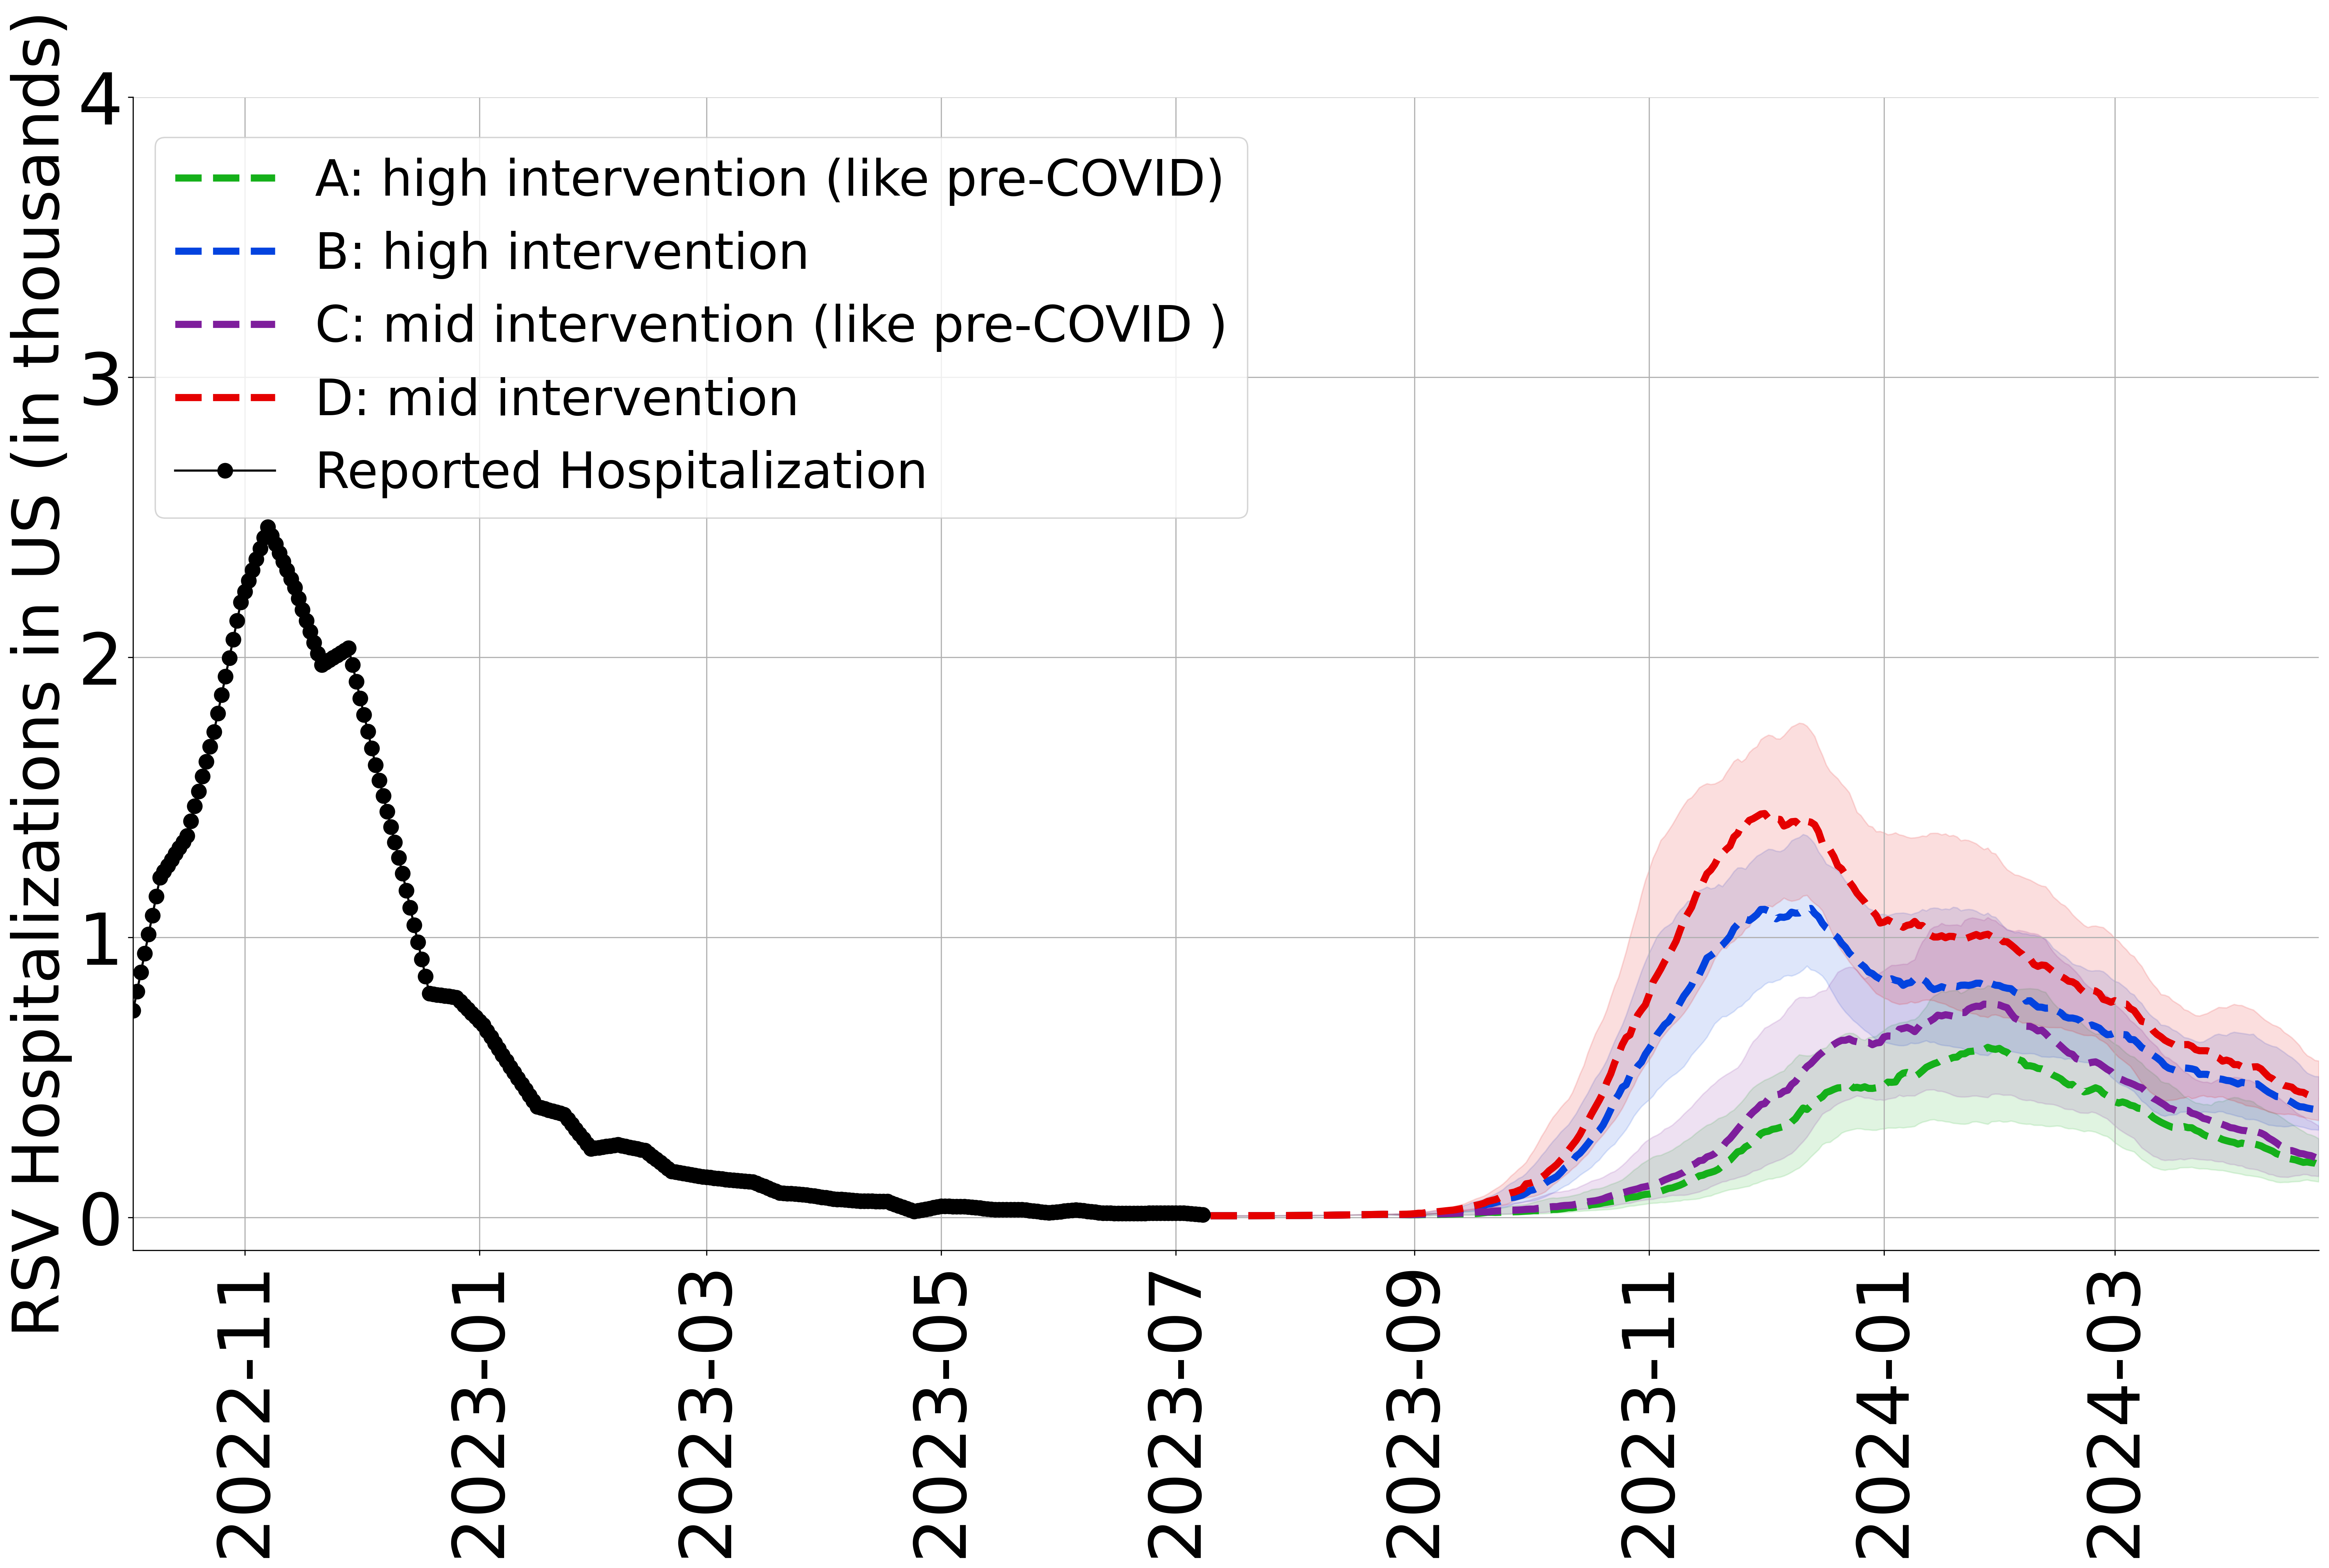

In [691]:
drange2 = pd.date_range("2022-10-03", periods=279, freq="1D")
drange3 = pd.date_range("2022-10-03", periods=309, freq="1D")
drange1 = pd.date_range("2023-07-10", periods=289, freq="1D")
#drange1 = pd.date_range("2023-07-10", periods=289, freq="1D")
#fig, ax = plt.subplots()
fig = plt.figure(num=None, figsize=(24, 16), dpi=300, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 50})


plt.fill_between(drange1, new_hosp_p_C[280:569,2], new_hosp_p_C[280:569,22], color='xkcd:green', alpha=0.13)
plt.plot(drange1, new_hosp_p_C[280:569,12], '--', color='xkcd:green', lw=5, label = 'A: high intervention (like pre-COVID)')

plt.fill_between(drange1, C1_low[280:569], C3_low[280:569], color='xkcd:blue', alpha=0.13)
plt.plot(drange1, C2_low[280:569], '--', color='xkcd:blue', lw=5, label = 'B: high intervention')

plt.fill_between(drange1, new_hosp_p_B[280:569,2], new_hosp_p_B[280:569,22], color='xkcd:purple', alpha=0.13)
plt.plot(drange1, new_hosp_p_B[280:569,12], '--', color='xkcd:purple', lw=5, label = 'C: mid intervention (like pre-COVID )')

plt.fill_between(drange1, B1_low[280:569], B3_low[280:569], color='xkcd:red', alpha=0.13)
plt.plot(drange1, B2_low[280:569], '--', color='xkcd:red', lw=5, label = 'D: mid intervention')





plt.plot(drange2, hosp_avg, 'k-o', markersize=10,label = 'Reported Hospitalization')


plt.xticks(rotation=90)

#plt.title(state + ' Hospitalization') 
plt.ylabel('RSV Hospitalizations in US (in thousands)',fontsize=45)
plt.legend(fontsize=35);
legend = plt.legend(loc='center', prop={'size': 35})  # Adjust the font size
# Set the legend's position to the center
legend.set_bbox_to_anchor((0.26, 0.8))
plt.autoscale(enable=True, axis='x', tight=True) 
plt.grid() 
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False) #plt.title('High protection')
#plt.title('Transmission like pre-COVID RSV season ')
#plt.axis([18970, 19285, 0, 1e6]) #plt.ylabel('reported deaths')
#plt.yticks([0, 500, 1000, 1500, 2000, 2500, 3000], ["0", "0.5", "1", "1.5", "2", "2.5", "3"])
plt.yticks([0, 1000, 2000, 3000, 4000], ["0", "1", "2", "3", "4"])
plt.tight_layout()

In [804]:
Dall= np.zeros([200,]) ## the set of code from here and below is to get the respective aversions in hosp and confidence interval percentage etc respective to age and day .. not just sum and overall
D0= np.zeros([200,]) 
D1= np.zeros([200,]) 
D2= np.zeros([200,]) 
D3= np.zeros([200,]) 
D4= np.zeros([200,]) 
D5= np.zeros([200,]) 
D6= np.zeros([200,]) 
Eall= np.zeros([200,]) 
E0= np.zeros([200,]) 
E1= np.zeros([200,]) 
E2= np.zeros([200,]) 
E3= np.zeros([200,]) 
E4= np.zeros([200,]) 
E5= np.zeros([200,]) 
E6= np.zeros([200,]) 
Fall= np.zeros([200,]) 
F0= np.zeros([200,]) 
F1= np.zeros([200,]) 
F2= np.zeros([200,]) 
F3= np.zeros([200,]) 
F4= np.zeros([200,]) 
F5= np.zeros([200,]) 
F6= np.zeros([200,]) 
Dall[0] = 0
D0[0] = 0
D1[0] = 0
D2[0] = 0
D3[0] = 0
D4[0] = 0
D5[0] = 0
D6[0] = 0
Eall[0] = 0
E0[0] = 0
E1[0] = 0
E2[0] = 0
E3[0] = 0
E4[0] = 0
E5[0] = 0
E6[0] = 0
Fall[0] = 0
F0[0] = 0
F1[0] = 0
F2[0] = 0
F3[0] = 0
F4[0] = 0
F5[0] = 0
F6[0] = 0
for i in range(200):
    Dall[i] = np.sum(new_hosp_A[333:569,i]) #from sept 1, 2023
    D0[i] = np.sum(new_hosp0_A[333:569,i])
    D1[i] = np.sum(new_hosp1_A[333:569,i])
    D2[i] = np.sum(new_hosp2_A[333:569,i])
    D3[i] = np.sum(new_hosp3_A[333:569,i])
    D4[i] = np.sum(new_hosp4_A[333:569,i])
    D5[i] = np.sum(new_hosp5_A[333:569,i])
    D6[i] = np.sum(new_hosp6_A[333:569,i])
    Eall[i] = np.sum(new_hosp_B[333:569,i])
    E0[i] = np.sum(new_hosp0_B[333:569,i])
    E1[i] = np.sum(new_hosp1_B[333:569,i])
    E2[i] = np.sum(new_hosp2_B[333:569,i])
    E3[i] = np.sum(new_hosp3_B[333:569,i])
    E4[i] = np.sum(new_hosp4_B[333:569,i])
    E5[i] = np.sum(new_hosp5_B[333:569,i])
    E6[i] = np.sum(new_hosp6_B[333:569,i])
    Fall[i] = np.sum(new_hosp_C[333:569,i])
    F0[i] = np.sum(new_hosp0_C[333:569,i])
    F1[i] = np.sum(new_hosp1_C[333:569,i])
    F2[i] = np.sum(new_hosp2_C[333:569,i])
    F3[i] = np.sum(new_hosp3_C[333:569,i])
    F4[i] = np.sum(new_hosp4_C[333:569,i])
    F5[i] = np.sum(new_hosp5_C[333:569,i])
    F6[i] = np.sum(new_hosp6_C[333:569,i])
    

In [805]:
#sumrsvpost = pd.DataFrame({'D':Dall, 'D0_1':D0, 'D2_4':D1, 'D5_11':D2, 'D12_18':D3, 'D19_49':D4, 'D50_64':D5, 'D65+':D6, 'E':Eall, 'E0_1':E0, 'E2_4':E1, 'E5_11':E2, 'E12_18':E3, 'E19_49':E4, 'E50_64':E5, 'E65+':E6, 'F':Fall, 'F0_1':F0, 'F2_4':F1, 'F5_11':F2, 'F12_18':F3, 'F19_49':F4, 'F50_64':F5, 'F65+':F6})
#sumrsvpost.to_csv('sumrsvpost.csv')
sumrsvpre = pd.DataFrame({'A':Dall, 'A0_1':D0, 'A2_4':D1, 'A5_11':D2, 'A12_18':D3, 'A19_49':D4, 'A50_64':D5, 'A65+':D6, 'B':Eall, 'B0_1':E0, 'B2_4':E1, 'B5_11':E2, 'B12_18':E3, 'B19_49':E4, 'B50_64':E5, 'B65+':E6, 'C':Fall, 'C0_1':F0, 'C2_4':F1, 'C5_11':F2, 'C12_18':F3, 'C19_49':F4, 'C50_64':F5, 'C65+':F6})
sumrsvpre.to_csv('sumrsvpre.csv')

In [806]:
ERall= np.zeros([200,])  ## these are the ratios E/D and F/D
ER0= np.zeros([200,]) 
ER1= np.zeros([200,]) 
ER2= np.zeros([200,]) 
ER3= np.zeros([200,]) 
ER4= np.zeros([200,]) 
ER5= np.zeros([200,]) 
ER6= np.zeros([200,]) 
FRall= np.zeros([200,]) 
FR0= np.zeros([200,]) 
FR1= np.zeros([200,]) 
FR2= np.zeros([200,]) 
FR3= np.zeros([200,]) 
FR4= np.zeros([200,]) 
FR5= np.zeros([200,]) 
FR6= np.zeros([200,]) 
ERall[0] = 0
ER0[0] = 0
ER1[0] = 0
ER2[0] = 0
ER3[0] = 0
ER4[0] = 0
ER5[0] = 0
ER6[0] = 0
FRall[0] = 0
FR0[0] = 0
FR1[0] = 0
FR2[0] = 0
FR3[0] = 0
FR4[0] = 0
FR5[0] = 0
FR6[0] = 0

for i in range(200):
    ERall[i] = (Eall[i]/Dall[i]) # to directly obtain percentatge averted we do 1- ratio (then later write in term of percentage)
    ER0[i] = (E0[i]/D0[i])
    ER1[i] = (E1[i]/D1[i])
    ER2[i] =  (E2[i]/D2[i])
    ER3[i] = (E3[i]/D3[i])
    ER4[i] = (E4[i]/D4[i])
    ER5[i] =  (E5[i]/D5[i])
    ER6[i] =  (E6[i]/D6[i])
    FRall[i] = (Fall[i]/Dall[i])
    FR0[i] = (F0[i]/D0[i])
    FR1[i] =  (F1[i]/D1[i])
    FR2[i] =  (F2[i]/D2[i])
    FR3[i] =  (F3[i]/D3[i])
    FR4[i] =  (F4[i]/D4[i])
    FR5[i] = (F5[i]/D5[i])
    FR6[i] = (F6[i]/D6[i])

In [807]:
RSpost = pd.DataFrame({ 'RE':ERall, 'RE0_1':ER0, 'RE2_4':ER1, 'RE5_11':ER2, 'RE12_18':ER3, 'RE19_49':ER4, 'RE50_64':ER5, 'RE65+':ER6, 'RF':FRall, 'RF0_1':FR0, 'RF2_4':FR1, 'RF5_11':FR2, 'RF12_18':FR3, 'RF19_49':FR4, 'RF50_64':FR5, 'RF65+':FR6})
RS2post = RSpost.fillna(0) # keeping this same column names for both pre and post 


In [808]:
RS2post

RE     RE0_1     RE2_4    RE5_11   RE12_18   RE19_49   RE50_64  \
0    0.813742  0.787384  1.001945  1.014940  0.952854  1.041202  0.927151   
1    0.818011  0.792035  1.017500  1.016378  0.970745  1.038987  0.956373   
2    0.823411  0.803325  0.996799  0.970080  1.008988  0.989383  0.944392   
3    0.808078  0.783397  0.990874  1.009570  0.971980  1.010362  0.923620   
4    0.808328  0.786477  0.990846  0.999117  0.994366  1.009089  0.911035   
..        ...       ...       ...       ...       ...       ...       ...   
195  0.781344  0.746366  0.992642  1.029346  1.014493  1.015402  0.915442   
196  0.824706  0.805640  1.000390  0.997311  0.930422  1.027032  0.948140   
197  0.808107  0.782137  1.003442  1.031899  0.987140  1.015031  0.936025   
198  0.796429  0.763258  1.010463  1.007955  1.041401  0.990635  0.923258   
199  0.830437  0.810344  0.994663  1.025285  0.985782  1.016683  0.946473   

        RE65+        RF     RF0_1     RF2_4    RF5_11   RF12_18   RF19_49  \
0    0.697041  0.633259  0.563389  1.003739  1.002971  1.019851  1.004431   
1    0.690132  0.643133  0.571444  1.006703  1.036041  0.993541  1.022028   
2    0.708658  0.648830  0.582574  1.001340  0.999884  1.062524  1.014998   
3    0.686296  0.638521  0.566344  0.998744  1.014951  0.958515  1.018794   
4    0.694221  0.631625  0.564647  0.985754  1.014976  1.022535  1.019805   
..        ...       ...       ...       ...       ...       ...       ...   
195  0.658025  0.607135  0.527341  1.006875  1.031239  1.090580  1.007970   
196  0.699843  0.648802  0.581809  1.002965  1.009971  0.973799  1.029475   
197  0.685273  0.635070  0.562153  0.997613  1.040699  1.134812  1.050498   
198  0.683280  0.618631  0.542407  0.995726  0.975394  1.056415  1.005538   
199  0.716193  0.653859  0.588473  0.996230  1.010400  1.041300  1.031123   

      RF50_64     RF65+  
0    0.869510  0.466452  
1    0.886815  0.479186  
2    0.854842  0.487015  
3    0.877341  0.464975  
4    0.855624  0.468864  
..        ...       ...  
195  0.848060  0.430580  
196  0.882808  0.486186  
197  0.876348  0.465299  
198  0.828892  0.465121  
199  0.870588  0.501323  

[200 rows x 16 columns]

In [809]:
RS2DF=RS2post['RF'].to_numpy() 
RS2DF0=RS2post['RF0_1'].to_numpy() 
RS2DF1=RS2post['RF2_4'].to_numpy() 
RS2DF2=RS2post['RF5_11'].to_numpy() 
RS2DF3=RS2post['RF12_18'].to_numpy() 
RS2DF4=RS2post['RF19_49'].to_numpy() 
RS2DF5=RS2post['RF50_64'].to_numpy() 
RS2DF6=RS2post['RF65+'].to_numpy() 
RS2DE=RS2post['RE'].to_numpy() 
RS2DE0=RS2post['RE0_1'].to_numpy() 
RS2DE1=RS2post['RE2_4'].to_numpy() 
RS2DE2=RS2post['RE5_11'].to_numpy() 
RS2DE3=RS2post['RE12_18'].to_numpy() 
RS2DE4=RS2post['RE19_49'].to_numpy() 
RS2DE5=RS2post['RE50_64'].to_numpy() 
RS2DE6=RS2post['RE65+'].to_numpy() 

In [810]:
DFper= np.percentile(RS2DF, [100*0.025,  100*0.5, 100*0.975])
DFper0= np.percentile(RS2DF0,[100*0.025,  100*0.5, 100*0.975])
DFper1= np.percentile(RS2DF1,[100*0.025,  100*0.5, 100*0.975])
DFper2= np.percentile(RS2DF2,[100*0.025,  100*0.5, 100*0.975])
DFper3= np.percentile(RS2DF3,[100*0.025,  100*0.5, 100*0.975])
DFper4= np.percentile(RS2DF4,[100*0.025,  100*0.5, 100*0.975])
DFper5= np.percentile(RS2DF5,[100*0.025,  100*0.5, 100*0.975])
DFper6= np.percentile(RS2DF6,[100*0.025,  100*0.5, 100*0.975])
DEper= np.percentile(RS2DE,[100*0.025,  100*0.5, 100*0.975])
DEper0= np.percentile(RS2DE0, [100*0.025,  100*0.5, 100*0.975])
DEper1= np.percentile(RS2DE1, [100*0.025,  100*0.5, 100*0.975])
DEper2= np.percentile(RS2DE2, [100*0.025,  100*0.5, 100*0.975])
DEper3= np.percentile(RS2DE3, [100*0.025,  100*0.5, 100*0.975])
DEper4= np.percentile(RS2DE4, [100*0.025,  100*0.5, 100*0.975])
DEper5= np.percentile(RS2DE5, [100*0.025,  100*0.5, 100*0.975])
DEper6= np.percentile(RS2DE6, [100*0.025,  100*0.5, 100*0.975])

#fracDFE = pd.DataFrame({'DFper':DFper,'DFper0':DFper0, 'DFper1':DFper1, 'DFper2':DFper2, 'DFper3':DFper3, 'DFper4':DFper4, 'DFper5':DFper5, 'DFper6':DFper6,'DEper':DEper,'DEper0':DEper0, 'DEper1':DEper1, 'DEper2':DEper2, 'DEper3':DEper3, 'DEper4':DEper4, 'DEper5':DEper5, 'DEper6':DEper6})
#fracDFE.to_csv('fracDFE.csv')
fracABC = pd.DataFrame({'ACper':DFper,'ACper0':DFper0, 'ACper1':DFper1, 'ACper2':DFper2, 'ACper3':DFper3, 'ACper4':DFper4, 'ACper5':DFper5, 'ACper6':DFper6,'ABper':DEper,'ABper0':DEper0, 'ABper1':DEper1, 'ABper2':DEper2, 'ABper3':DEper3, 'ABper4':DEper4, 'ABper5':DEper5, 'ABper6':DEper6})
fracABC.to_csv('fracABC.csv')

In [811]:
fracABC

ACper    ACper0    ACper1    ACper2    ACper3    ACper4    ACper5  \
0  0.612321  0.532003  0.978098  0.988393  0.945146  0.994007  0.835710   
1  0.636929  0.565051  0.998536  1.018651  1.033348  1.022288  0.864157   
2  0.658497  0.592247  1.017369  1.057079  1.153107  1.064343  0.886833   

     ACper6     ABper    ABper0    ABper1    ABper2    ABper3    ABper4  \
0  0.435233  0.788276  0.750179  0.980222  0.983148  0.932089  0.982952   
1  0.473236  0.812258  0.786729  0.998999  1.013112  1.018472  1.011413   
2  0.503270  0.831167  0.813138  1.014963  1.041002  1.103898  1.046132   

     ABper5    ABper6  
0  0.906397  0.662689  
1  0.931635  0.694454  
2  0.956375  0.716253

In [812]:
drange4 = pd.date_range("2022-10-03", periods=569, freq="1D")

In [69]:
A1_low = new_hosp_p_A[:,2]
A2_low = new_hosp_p_A[:,12]
A3_low = new_hosp_p_A[:,22]
B1_low = new_hosp_p_B[:,2]
B2_low = new_hosp_p_B[:,12]
B3_low = new_hosp_p_B[:,22]
C1_low = new_hosp_p_C[:,2]
C2_low = new_hosp_p_C[:,12]
C3_low = new_hosp_p_C[:,22]
A1_low0 = new_hosp_p0_A[:,2]
A2_low0 = new_hosp_p0_A[:,12]
A3_low0 = new_hosp_p0_A[:,22]
B1_low0 = new_hosp_p0_B[:,2]
B2_low0 = new_hosp_p0_B[:,12]
B3_low0 = new_hosp_p0_B[:,22]
C1_low0 = new_hosp_p0_C[:,2]
C2_low0 = new_hosp_p0_C[:,12]
C3_low0 = new_hosp_p0_C[:,22]
A1_low1 = new_hosp_p1_A[:,2]
A2_low1 = new_hosp_p1_A[:,12]
A3_low1 = new_hosp_p1_A[:,22]
B1_low1 = new_hosp_p1_B[:,2]
B2_low1 = new_hosp_p1_B[:,12]
B3_low1 = new_hosp_p1_B[:,22]
C1_low1 = new_hosp_p1_C[:,2]
C2_low1 = new_hosp_p1_C[:,12]
C3_low1 = new_hosp_p1_C[:,22]
A1_low2 = new_hosp_p2_A[:,2]
A2_low2 = new_hosp_p2_A[:,12]
A3_low2 = new_hosp_p2_A[:,22]
B1_low2 = new_hosp_p2_B[:,2]
B2_low2 = new_hosp_p2_B[:,12]
B3_low2 = new_hosp_p2_B[:,22]
C1_low2 = new_hosp_p2_C[:,2]
C2_low2 = new_hosp_p2_C[:,12]
C3_low2 = new_hosp_p2_C[:,22]
A1_low3 = new_hosp_p3_A[:,2]
A2_low3 = new_hosp_p3_A[:,12]
A3_low3 = new_hosp_p3_A[:,22]
B1_low3 = new_hosp_p3_B[:,2]
B2_low3 = new_hosp_p3_B[:,12]
B3_low3 = new_hosp_p3_B[:,22]
C1_low3 = new_hosp_p3_C[:,2]
C2_low3 = new_hosp_p3_C[:,12]
C3_low3 = new_hosp_p3_C[:,22]
A1_low4 = new_hosp_p4_A[:,2]
A2_low4 = new_hosp_p4_A[:,12]
A3_low4 = new_hosp_p4_A[:,22]
B1_low4 = new_hosp_p4_B[:,2]
B2_low4 = new_hosp_p4_B[:,12]
B3_low4 = new_hosp_p4_B[:,22]
C1_low4 = new_hosp_p4_C[:,2]
C2_low4 = new_hosp_p4_C[:,12]
C3_low4 = new_hosp_p4_C[:,22]
A1_low5 = new_hosp_p5_A[:,2]
A2_low5 = new_hosp_p5_A[:,12]
A3_low5 = new_hosp_p5_A[:,22]
B1_low5 = new_hosp_p5_B[:,2]
B2_low5 = new_hosp_p5_B[:,12]
B3_low5 = new_hosp_p5_B[:,22]
C1_low5 = new_hosp_p5_C[:,2]
C2_low5 = new_hosp_p5_C[:,12]
C3_low5 = new_hosp_p5_C[:,22]
A1_low6 = new_hosp_p6_A[:,2]
A2_low6 = new_hosp_p6_A[:,12]
A3_low6 = new_hosp_p6_A[:,22]
B1_low6 = new_hosp_p6_B[:,2]
B2_low6 = new_hosp_p6_B[:,12]
B3_low6 = new_hosp_p6_B[:,22]
C1_low6 = new_hosp_p6_C[:,2]
C2_low6 = new_hosp_p6_C[:,12]
C3_low6 = new_hosp_p6_C[:,22]

In [813]:
import pandas as pd

# create a dictionary with some data
RSV = {
    'Date' : drange4,
    #'Actual_data':hosp_avg,
    'Fit_data_hosp':H_ov_avg2b,
    '2.5_A': new_hosp_p_A[:,2],
    '50_A': new_hosp_p_A[:,12],
    '97.5_A': new_hosp_p_A[:,22],
    '2.5_B': new_hosp_p_B[:,2],
    '50_B': new_hosp_p_B[:,12],
    '97.5_B': new_hosp_p_B[:,22],
    '2.5_C': new_hosp_p_C[:,2],
    '50_C': new_hosp_p_C[:,12],
    '97.5_C': new_hosp_p_C[:,22],
    '2.5_A_0_1' : new_hosp_p0_A[:,2],
    '50_A_0_1': new_hosp_p0_A[:,12],
    '97.5_A_0_1': new_hosp_p0_A[:,22],
    '2.5_B_0_1': new_hosp_p0_B[:,2],
    '50_B_0_1': new_hosp_p0_B[:,12],
    '97.5_B_0_1': new_hosp_p0_B[:,22],
    '2.5_C_0_1': new_hosp_p0_C[:,2],
    '50_C_0_1': new_hosp_p0_C[:,12],
    '97.5_C_0_1': new_hosp_p0_C[:,22],
    '2.5_A_2_4': new_hosp_p1_A[:,2],
    '50_A_2_4': new_hosp_p1_A[:,12],
    '97.5_A_2_4': new_hosp_p1_A[:,22],
    '2.5_B_2_4': new_hosp_p1_B[:,2],
    '50_B_2_4': new_hosp_p1_B[:,12],
    '97.5_B_2_4': new_hosp_p1_B[:,22],
    '2.5_C_2_4': new_hosp_p1_C[:,2],
    '50_C_2_4': new_hosp_p1_C[:,12],
    '97.5_C_2_4': new_hosp_p1_C[:,22],
    '2.5_A_5_11': new_hosp_p2_A[:,2],
    '50_A_5_11': new_hosp_p2_A[:,12],
    '97.5_A_5_11': new_hosp_p2_A[:,22],
    '2.5_B_5_11': new_hosp_p2_B[:,2],
    '50_B_5_11': new_hosp_p2_B[:,12],
    '97.5_B_5_11': new_hosp_p2_B[:,22],
    '2.5_C_5_11': new_hosp_p2_C[:,2],
    '50_C_5_11': new_hosp_p2_C[:,12],
    '97.5_C_5_11': new_hosp_p2_C[:,22],
    '2.5_A_12_18': new_hosp_p3_A[:,2],
    '50_A_12_18': new_hosp_p3_A[:,12],
    '97.5_A_12_18': new_hosp_p3_A[:,22],
    '2.5_B_12_18': new_hosp_p3_B[:,2],
    '50_B_12_18': new_hosp_p3_B[:,12],
    '97.5_B_12_18': new_hosp_p3_B[:,22],
    '2.5_C_12_18': new_hosp_p3_C[:,2],
    '50_C_12_18': new_hosp_p3_C[:,12],
    '97.5_C_12_18': new_hosp_p3_C[:,22],
    '2.5_A_19_49': new_hosp_p4_A[:,2],
    '50_A_19_49': new_hosp_p4_A[:,12],
    '97.5_A_19_49': new_hosp_p4_A[:,22],
    '2.5_B_19_49': new_hosp_p4_B[:,2],
    '50_B_19_49': new_hosp_p4_B[:,12],
    '97.5_B_19_49': new_hosp_p4_B[:,22],
    '2.5_C_19_49': new_hosp_p4_C[:,2],
    '50_C_19_49': new_hosp_p4_C[:,12],
    '97.5_C_19_49': new_hosp_p4_C[:,22],
    '2.5_A_50_64': new_hosp_p5_A[:,2],
    '50_A_50_64': new_hosp_p5_A[:,12],
    '97.5_A_50_64': new_hosp_p5_A[:,22],
    '2.5_B_50_64': new_hosp_p5_B[:,2],
    '50_B_50_64': new_hosp_p5_B[:,12],
    '97.5_B_50_64': new_hosp_p5_B[:,22],
    '2.5_C_50_64': new_hosp_p5_C[:,2],
    '50_C_50_64': new_hosp_p5_C[:,12],
    '97.5_C_50_64': new_hosp_p5_C[:,22],
    '2.5_A_65+': new_hosp_p6_A[:,2],
    '50_A_65+': new_hosp_p6_A[:,12],
    '97.5_A_65+': new_hosp_p6_A[:,22],
    '2.5_B_65+': new_hosp_p6_B[:,2],
    '50_B_65+': new_hosp_p6_B[:,12],
    '97.5_B_65+': new_hosp_p6_B[:,22],
    '2.5_C_65+': new_hosp_p6_C[:,2],
    '50_C_65+': new_hosp_p6_C[:,12],
    '97.5_C_65+': new_hosp_p6_C[:,22],
    '2.5_D': A1_low,
    '50_D': A2_low,
    '97.5_D': A3_low,
    '2.5_E': B1_low,
    '50_E': B2_low,
    '97.5_E': B3_low,
    '2.5_F': C1_low,
    '50_F': C2_low,
    '97.5_F': C3_low,
    '2.5_D_0_1' : A1_low0,
    '50_D_0_1': A2_low0,
    '97.5_D_0_1': A3_low0,
    '2.5_E_0_1': B1_low0,
    '50_E_0_1': B2_low0,
    '97.5_E_0_1': B3_low0,
    '2.5_F_0_1': C1_low0,
    '50_F_0_1': C2_low0,
    '97.5_F_0_1': C3_low0,
    '2.5_D_2_4': A1_low1,
    '50_D_2_4': A2_low1,
    '97.5_D_2_4': A3_low1,
    '2.5_E_2_4': B1_low1,
    '50_E_2_4': B2_low1,
    '97.5_E_2_4': B3_low1,
    '2.5_F_2_4': C1_low1,
    '50_F_2_4': C2_low1,
    '97.5_F_2_4': C3_low1,
    '2.5_D_5_11': A1_low2,
    '50_D_5_11': A2_low2,
    '97.5_D_5_11': A3_low2,
    '2.5_E_5_11': B1_low2,
    '50_E_5_11': B2_low2,
    '97.5_E_5_11': B3_low2,
    '2.5_F_5_11': C1_low2,
    '50_F_5_11': C2_low2,
    '97.5_F_5_11': C3_low2,
    '2.5_D_12_18': A1_low3,
    '50_D_12_18': A2_low3,
    '97.5_D_12_18': A3_low3,
    '2.5_E_12_18': B1_low3,
    '50_E_12_18': B2_low3,
    '97.5_E_12_18': B3_low3,
    '2.5_F_12_18': C1_low3,
    '50_F_12_18': C2_low3,
    '97.5_F_12_18': C3_low3,
    '2.5_D_19_49':  A1_low4,
    '50_D_19_49':  A2_low4,
    '97.5_D_19_49':  A3_low4,
    '2.5_E_19_49': B1_low4,
    '50_E_19_49': B2_low4,
    '97.5_E_19_49': B3_low4,
    '2.5_F_19_49': C1_low4,
    '50_F_19_49': C2_low4,
    '97.5_F_19_49': C3_low4,
    '2.5_D_50_64': A1_low5,
    '50_D_50_64': A2_low5,
    '97.5_D_50_64': A3_low5,
    '2.5_E_50_64': B1_low5,
    '50_E_50_64': B2_low5,
    '97.5_E_50_64': B3_low5,
    '2.5_F_50_64':  C1_low5,
    '50_F_50_64':  C2_low5,
    '97.5_F_50_64':  C3_low5,
    '2.5_D_65+': A1_low6,
    '50_D_65+': A2_low6,
    '97.5_D_65+': A3_low6,
    '2.5_E_65+': B1_low6,
    '50_E_65+': B2_low6,
    '97.5_E_65+': B3_low6,
    '2.5_F_65+': C1_low6,
    '50_F_65+': C2_low6,
    '97.5_F_65+': C3_low6

 
}
# create a DataFrame from the dictionary
d5RSV = pd.DataFrame(RSV)

# print the DataFrame
#print(dABCD)


In [814]:
d5RSV.to_csv(state+'RSV_pre_post_LatestNEW.csv', index=False)


In [76]:
def to_week_cum(case, state, typee):
    case_cum = np.zeros([294, 25])
    case_w = np.zeros([42, 25])
    
    if (typee == 'hosp'):

        for i in range(1,294):
            case_cum[i,:] = case_cum[i-1,:] + case[i,:] 

        for j in range(25):    
            for i in range(41):
                case_w[i, j] = np.mean(case_cum[ i*7:(i+1)*7, j])
    else:
        for i in range(1,294):
            case_cum[i,:] = case_cum[i-1,:] + case[i,:] 

        for j in range(25):    
            for i in range(41):
                case_w[i, j] = np.mean(case_cum[ i*7:(i+1)*7, j])        

    return case_w[0:41,:]

In [ ]:
### calculatring peak time 

In [145]:
import datetime
def calcul_peak_date(case,lenth,start_t,end_t):
    peaks = np.zeros([lenth,])
    peak_d = np.zeros([lenth,])
    my_date = datetime.datetime(2022, 10, 3, 0, 0, 0)
    for j in range(lenth):
        peaks[j] = np.max(case[start_t:end_t,j])
        for i in range(start_t,end_t):
            if (case[i,j] >= peaks[j]):
                peak_d[j] = i
    peak_d_p = np.percentile(peak_d, [0, 100*0.01, 100*0.025, 100*0.05, 100*0.1, 100*0.15, 100*0.2, 100*0.25, 100*0.3, 100*0.35, 100*0.4, 100*0.45, 100*0.5, 100*0.55, 100*0.6, 100*0.65, 100*0.7, 100*0.75, 100*0.8, 100*0.85, 100*0.9, 100*0.95, 100*0.975, 100*0.99, 100])
    print(peak_d_p[12])
    my_date_50 = my_date + datetime.timedelta(days = peak_d_p[12])
    my_date_50 = my_date_50.strftime('%m/%d')
    my_date_5 = my_date + datetime.timedelta(days = peak_d_p[2])
    my_date_5 = my_date_5.strftime('%m/%d')
    my_date_95 = my_date + datetime.timedelta(days = peak_d_p[22])
    my_date_95 = my_date_95.strftime('%m/%d')
    print(str((my_date_50)) + " [" + str((my_date_5)) + ", " + str((my_date_95)) + "]")

In [146]:
calcul_peak_date(new_hosp_p_C,25,289,569)

433.0
12/10 [12/04, 12/13]


In [147]:
calcul_peak_date(new_hosp_p_A,25,289,569)

425.0
12/02 [11/25, 12/10]


In [ ]:
plt.fill_between(drange1, new_hosp_p_C[280:569,2]/1000, new_hosp_p_C[280:569,22]/1000, color='xkcd:purple', alpha=0.13)
plt.plot(drange1, new_hosp_p_C[280:569,12]/1000, '--', color='xkcd:purple', lw=5, label = 'RSV-A')#: high intervention (like pre-COVID)

plt.fill_between(drange1, new_hosp_p_A[280:569,2]/1000, new_hosp_p_A[280:569,22]/1000, color='xkcd:tea', alpha=0.13)
plt.plot(drange1, new_hosp_p_A[280:569,12]/1000, '--', color='xkcd:tea', lw=5, label = 'RSV-B')#: low intervention (like pre-COVID )

plt.fill_between(drange1, C1_low[280:569]/1000, C3_low[280:569]/1000, color='xkcd:red', alpha=0.13)
plt.plot(drange1, C2_low[280:569]/1000, '--', color='xkcd:red', lw=5, label = 'RSV-C')#: high intervention (like 22-23 season)


plt.fill_between(drange1, A1_low[280:569]/1000, A3_low[280:569]/1000, color='xkcd:blue', alpha=0.13)
plt.plot(drange1, A2_low[280:569]/1000, '--', color='xkcd:blue', lw=5, label = 'RSV-D')#: low intervention (like 22-23 season)

